In [1]:
# retina
%config InlineBackend.figure_format = 'retina'

In [7]:
import os
from pathlib import Path
import pickle
import numpy as np
from matplotlib import pyplot as plt
from astropy.io import fits
from astropy.table import Table
import eazy

from matplotlib import rcParams
plt.rcParams["font.size"] = 20
plt.rcParams["axes.labelsize"] = 25

WD = Path('/data1/hbahk/spherex-photoz/spherex-challenge/challenge')
os.chdir(WD)

from utils import plot_comp_hexbin

In [50]:
imag = 19
params = {}
params['FILTERS_RES']       = "FILTERS+spherex_reduced.res"
params['TEMPLATES_FILE']    = "spherex_brown_cosmos.templates"
params['WAVELENGTH_FILE ']  = "../lambda.def" # TODO: check this
params['TEMP_ERR_FILE']     = "../template_error_cosmos2020.txt" # TODO: check this

params['TEMPLATE_COMBOS']   = 1
params['TEMP_ERR_A2']       = 0.0
params['SYS_ERR']           = 0.01

params['MW_EBV']            = 0.012
params['CAT_HAS_EXTCORR']   = True

params['CATALOG_FILE']      = f"data/synphot_i{imag:02d}.dat" 

dir_output = WD/f"output_i{imag:02d}"
dir_outfig = dir_output/f"outfig_i{imag:02d}"
if not dir_output.exists():
    dir_output.mkdir()
if not dir_outfig.exists():
    dir_outfig.mkdir()

params['OUTPUT_DIRECTORY']  = dir_output.as_posix()
params['MAIN_OUTPUT_FILE']  = f"output_i{imag:02d}"

params['APPLY_PRIOR']       = True
params['PRIOR_FILE']        = "../prior_K_TAO.dat"
params['PRIOR_FILTER']      = 466  # 2MASS Ks band
params['PRIOR_ABZP']        = 23.9
params['PRIOR_FLOOR']       = 0.01

params['FIX_ZSPEC']         = False
params['Z_MIN']             = 0.015
params['Z_MAX']             = 5.8
params['Z_STEP']            = 0.001
params['Z_STEP_TYPE']       = 1

translate_filename = 'dummy.translate'

In [41]:
imag = 22
params['CATALOG_FILE']      = f"data/synphot_i{imag:02d}.dat" 

dir_output = WD/f"output_i{imag:02d}"
dir_outfig = dir_output/f"outfig_i{imag:02d}"
if not dir_output.exists():
    dir_output.mkdir()
if not dir_outfig.exists():
    dir_outfig.mkdir()

params['OUTPUT_DIRECTORY']  = dir_output.as_posix()
params['MAIN_OUTPUT_FILE']  = f"output_i{imag:02d}"

params['TEMPLATE_COMBOS']   = 1
params['Z_STEP']            = 0.003

with open('tempfilt0003.pickle', 'rb') as rfile:
    tempfilt = pickle.load(rfile)

# params['TEMPLATES_FILE']    = "BROWN_COSMOS.template"
params['TEMPLATES_FILE']    = "spherex_brown_cosmos.templates"
    
ez = eazy.photoz.PhotoZ(param_file=None, translate_file=translate_filename,
                        zeropoint_file=None, params=params, tempfilt=tempfilt, )
ez.fit_catalog(ez.idx, n_proc=1)

Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: data/synphot_i22.dat
   >>> NOBJ = 1856
F419 E419 (419): SPHEREx_Band1_1
F420 E420 (420): SPHEREx_Band1_2
F421 E421 (421): SPHEREx_Band1_3
F422 E422 (422): SPHEREx_Band1_4
F423 E423 (423): SPHEREx_Band1_5
F424 E424 (424): SPHEREx_Band1_6
F425 E425 (425): SPHEREx_Band1_7
F426 E426 (426): SPHEREx_Band1_8
F427 E427 (427): SPHEREx_Band1_9
F428 E428 (428): SPHEREx_Band1_10
F429 E429 (429): SPHEREx_Band1_11
F430 E430 (430): SPHEREx_Band1_12
F431 E431 (431): SPHEREx_Band1_13
F432 E432 (432): SPHEREx_Band1_14
F433 E433 (433): SPHEREx_Band1_15
F434 E434 (434): SPHEREx_Band1_16
F435 E435 (435): SPHEREx_Band1_17
F436 E436 (436): SPHEREx_Band2_1
F437 E437 (437): SPHEREx_Band2_2
F438 E438 (438): SPHEREx_Band2_3
F439 E439 (439): SPHEREx_Band2_4
F440 E440 (440): SPHEREx_Band2_5
F441 E441 (441): SPHEREx_Band2_6
F442 E442 (442): SPHEREx_Band2_7
F443 E443 (443): SPHEREx_Band2_8
F4

635it [00:00, 785.72it/s]
100%|██████████| 635/635 [17:27<00:00,  1.65s/it]


Compute best fits
fit_best: 3.1 s (n_proc=1,  NOBJ=1852)
Fit 1051.5 s (n_proc=1, NOBJ=1856)


fit_best: 2.6 s (n_proc=1,  NOBJ=1852)
Objects : 1852
Outliers: 439


fit_best: 2.1 s (n_proc=1,  NOBJ=1856)
Objects : 1856
Outliers: 392




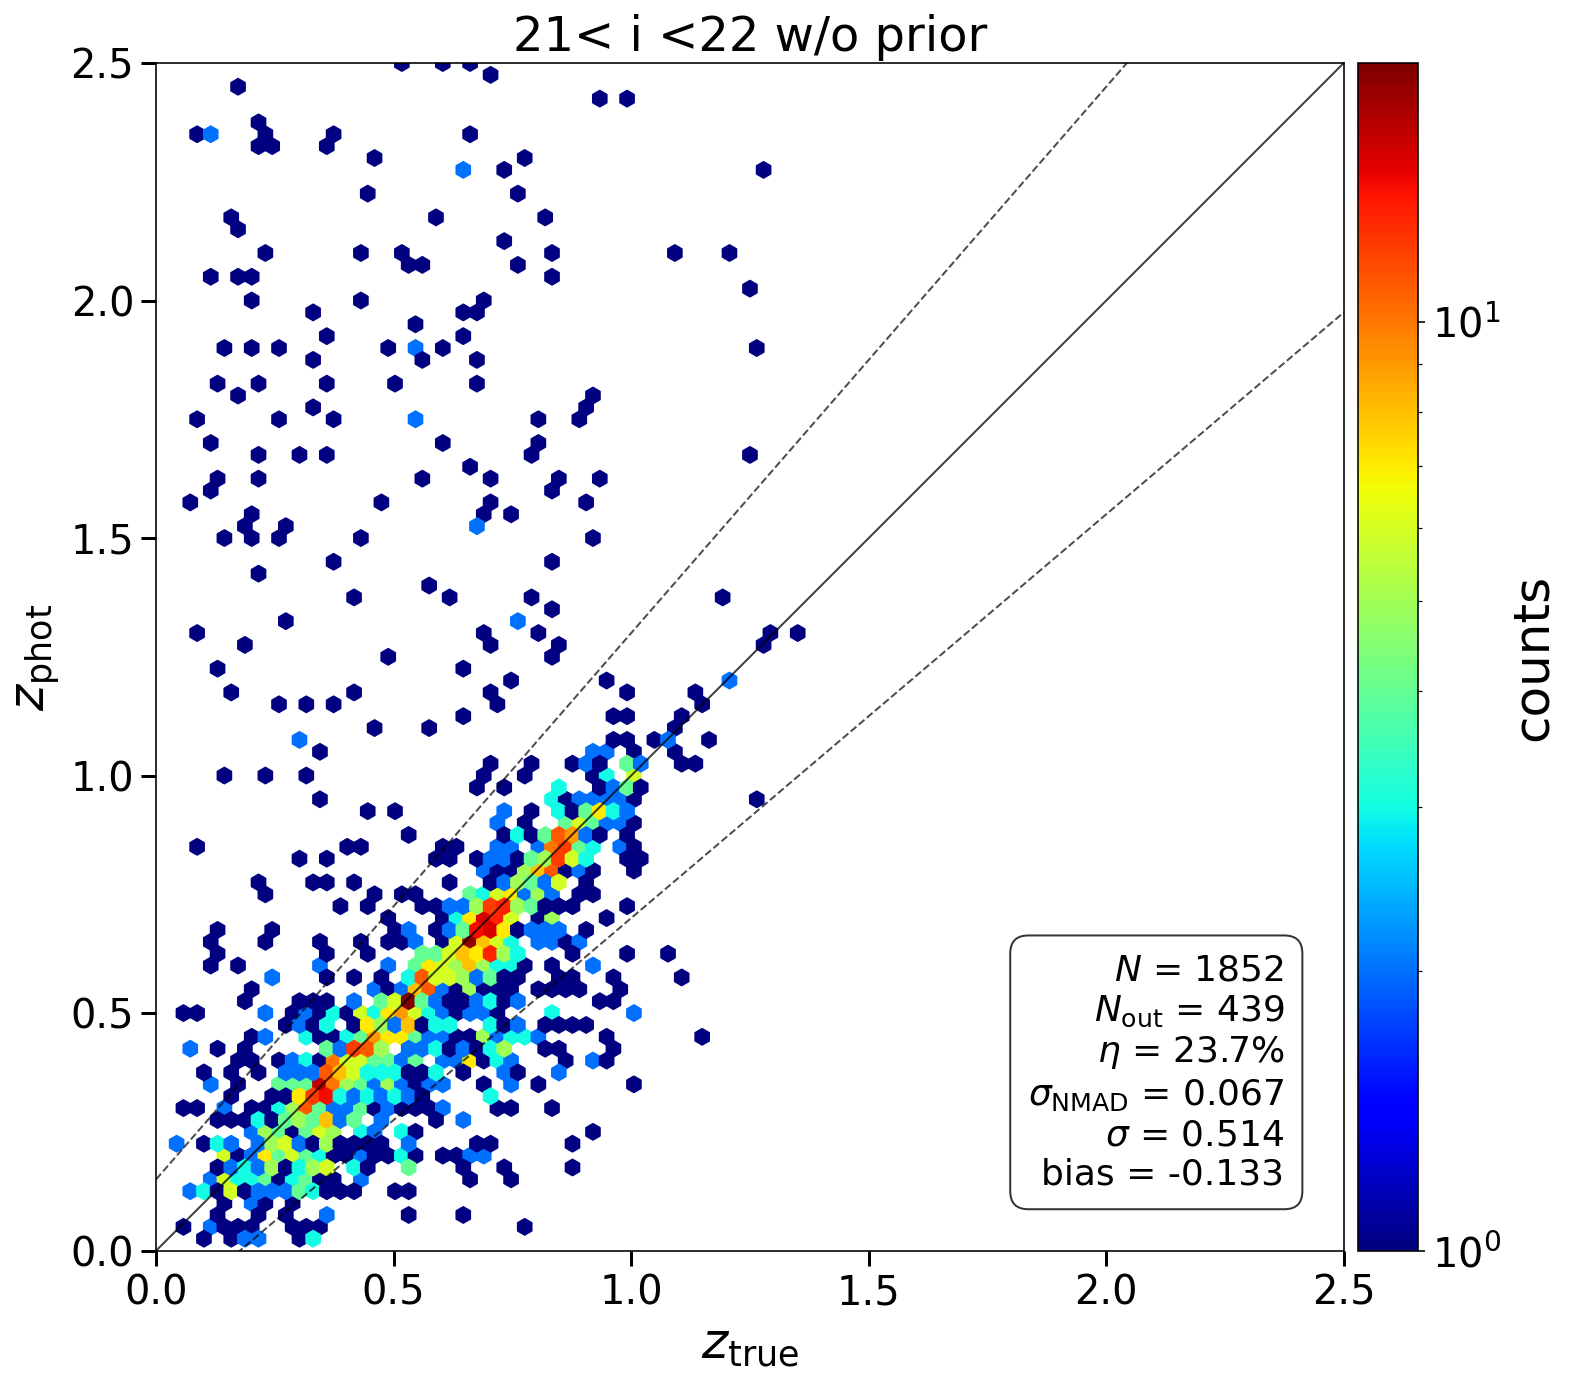

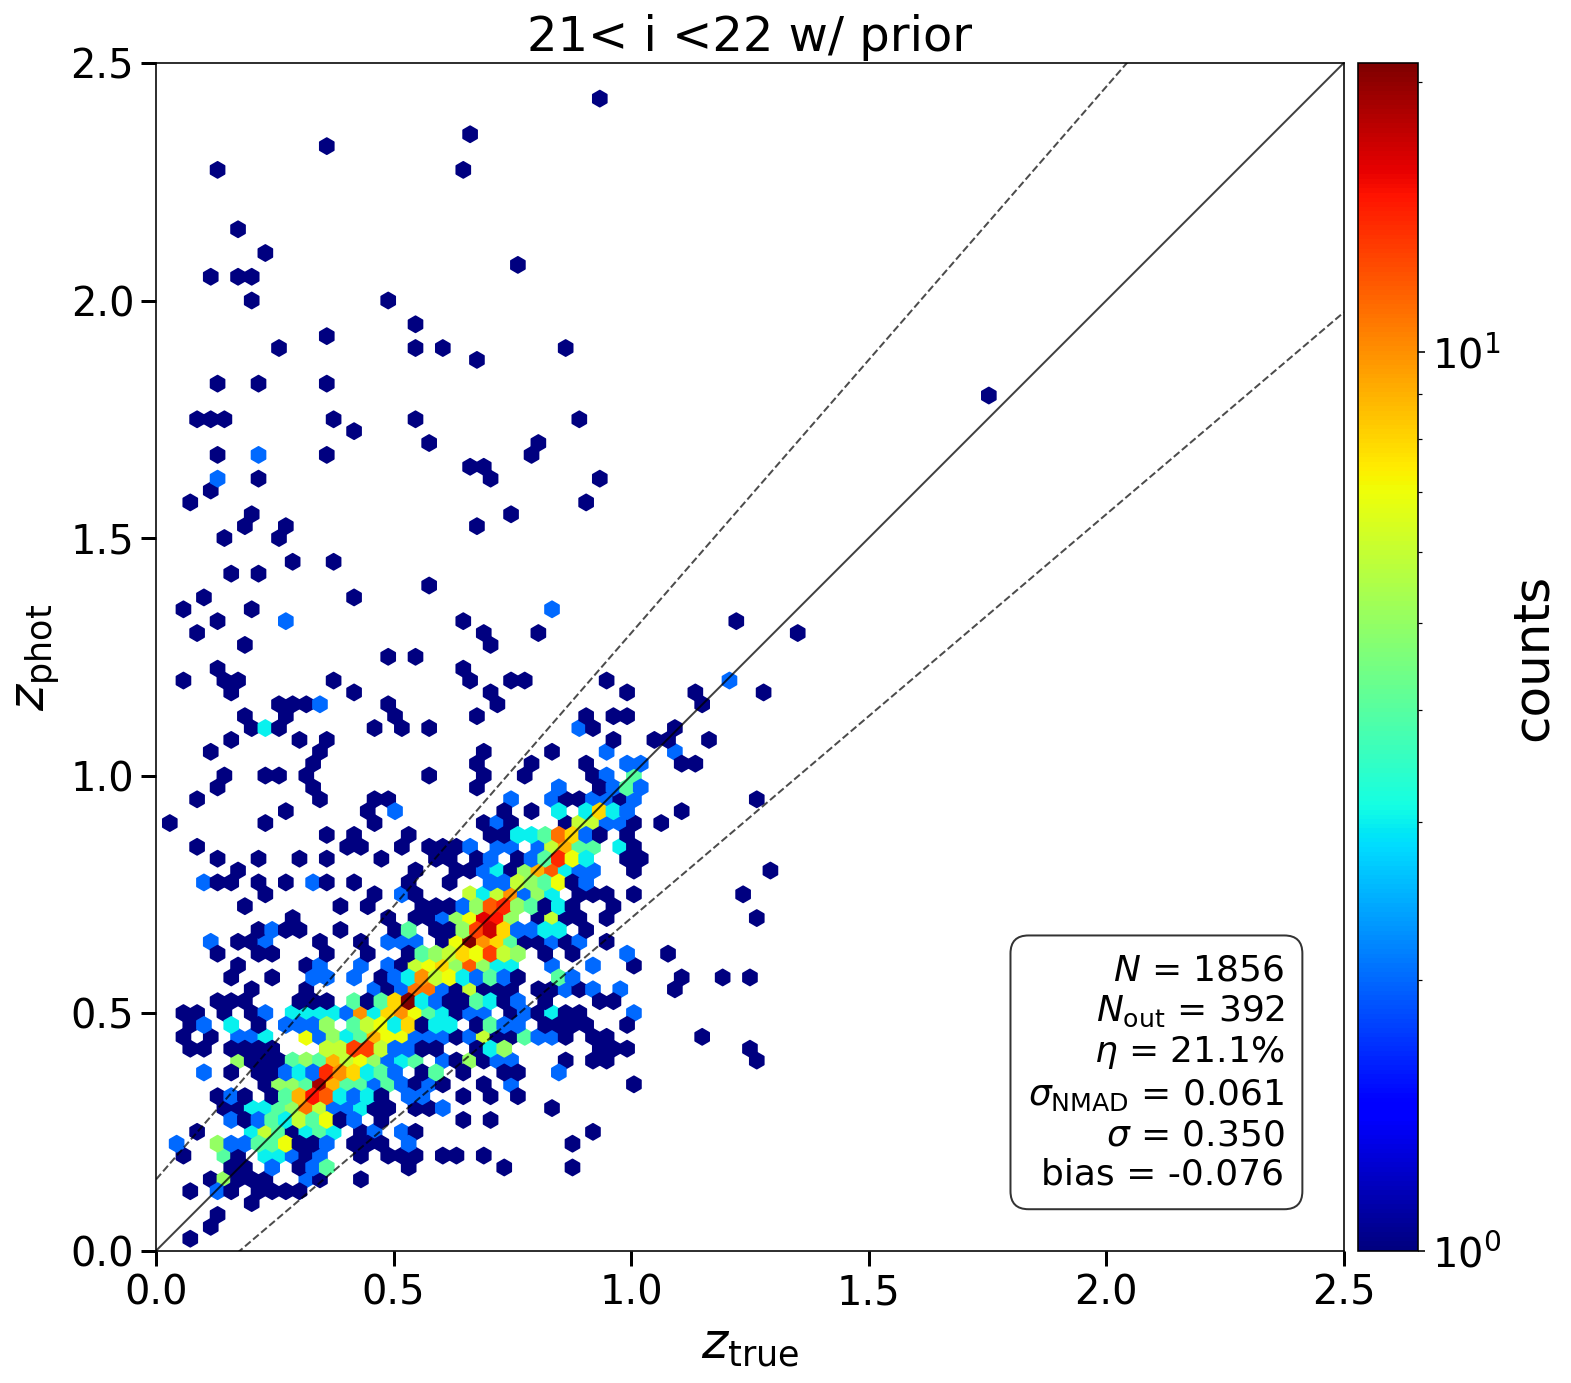

In [42]:
ez.ZML_WITH_PRIOR = None
ez.fit_at_zbest(prior=False, nproc=1)
cat = Table.read(WD/f'data/fiducial102_reduced_i{imag:02d}.fits')
id_out = plot_comp_hexbin(cat['z_true'], ez.zbest, ez.chi2_best,
                          'Fig1-comp_z_eazypy.png', ez.idx,
                          label_x=r"$z_{\rm true}$", label_y=r"$z_{\rm phot}$",
                          title=f"{imag-1:02d}< i <{imag:02d} w/o prior",
                          xmin=0, xmax=2.5, cmap='jet',
                          scatter_plot=False, gridsize=(87,50), log_scale=False)

cat['z_phot'] = ez.zbest
cat['z_phot_chi2'] = ez.chi2_best
cat.write(dir_output/f'simple_output_i{imag:02d}_wo_prior_single.fits', overwrite=True)

ez.ZML_WITH_PRIOR = True
ez.fit_at_zbest(prior=True, nproc=1)

cat = Table.read(WD/f'data/fiducial102_reduced_i{imag:02d}.fits')
id_out = plot_comp_hexbin(cat['z_true'], ez.zbest, ez.chi2_best,
                          'Fig1-comp_z_eazypy.png', ez.idx,
                          label_x=r"$z_{\rm true}$", label_y=r"$z_{\rm phot}$",
                          title=f"{imag-1:02d}< i <{imag:02d} w/ prior",
                          xmin=0, xmax=2.5, cmap='jet',
                          scatter_plot=False, gridsize=(87,50), log_scale=False)

cat['z_phot'] = ez.zbest
cat['z_phot_chi2'] = ez.chi2_best
cat.write(dir_output/f'simple_output_i{imag:02d}_prior_single.fits', overwrite=True)

In [16]:
ez.zbest_risk

array([0.27221906, 0.05503208, 0.17355324, ..., 0.63762176, 0.26964495,
       0.5617749 ], dtype=float32)

In [33]:
imag = 22

dir_output = WD/f"output_combined_i{imag:02d}"
dir_outfig = dir_output/f"outfig_i{imag:02d}"
if not dir_output.exists():
    dir_output.mkdir()
if not dir_outfig.exists():
    dir_outfig.mkdir()

params['OUTPUT_DIRECTORY']  = dir_output.as_posix()
params['MAIN_OUTPUT_FILE']  = f"output_i{imag:02d}"

params['TEMPLATE_COMBOS']   = 1
params['Z_STEP']            = 0.001

params['CATALOG_FILE']      = f"data/synphot_combined_i{imag:02d}.dat" 
params['FILTERS_RES']       = "FILTERS+spherex_reduced_fullband_halfband.res"
with open('tempfilt0001_comb.pickle', 'rb') as rfile:
    tempfilt = pickle.load(rfile)

# params['TEMPLATES_FILE']    = "BROWN_COSMOS.template"
params['TEMPLATES_FILE']    = "spherex_brown_cosmos.templates"
    
ez = eazy.photoz.PhotoZ(param_file=None, translate_file=translate_filename,
                        zeropoint_file=None, params=params, tempfilt=tempfilt, )
ez.fit_catalog(ez.idx, n_proc=1)
# ez.fit_single_templates()

Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: data/synphot_combined_i22.dat
   >>> NOBJ = 1856
F419 E419 (419): SPHEREx_Band1_1
F420 E420 (420): SPHEREx_Band1_2
F421 E421 (421): SPHEREx_Band1_3
F422 E422 (422): SPHEREx_Band1_4
F423 E423 (423): SPHEREx_Band1_5
F424 E424 (424): SPHEREx_Band1_6
F425 E425 (425): SPHEREx_Band1_7
F426 E426 (426): SPHEREx_Band1_8
F427 E427 (427): SPHEREx_Band1_9
F428 E428 (428): SPHEREx_Band1_10
F429 E429 (429): SPHEREx_Band1_11
F430 E430 (430): SPHEREx_Band1_12
F431 E431 (431): SPHEREx_Band1_13
F432 E432 (432): SPHEREx_Band1_14
F433 E433 (433): SPHEREx_Band1_15
F434 E434 (434): SPHEREx_Band1_16
F435 E435 (435): SPHEREx_Band1_17
F436 E436 (436): SPHEREx_Band2_1
F437 E437 (437): SPHEREx_Band2_2
F438 E438 (438): SPHEREx_Band2_3
F439 E439 (439): SPHEREx_Band2_4
F440 E440 (440): SPHEREx_Band2_5
F441 E441 (441): SPHEREx_Band2_6
F442 E442 (442): SPHEREx_Band2_7
F443 E443 (443): SPHEREx_B

/data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/photoz.py:1326: RuntimeWarning: invalid value encountered in log10
  self.prior_mag_cat += -2.5*np.log10(np.squeeze(self.fnu[:,ix]))


Set sys_err = 0.01 (positive=True)
Read PRIOR_FILE:  ../prior_K_TAO.dat


1903it [00:02, 673.38it/s]
100%|██████████| 1903/1903 [48:54<00:00,  1.54s/it] 


Compute best fits
fit_best: 2.4 s (n_proc=1,  NOBJ=1847)
Fit 2938.6 s (n_proc=1, NOBJ=1856)


Objects : 1847
Outliers: 349


fit_best: 2.2 s (n_proc=1,  NOBJ=1853)
Objects : 1853
Outliers: 305




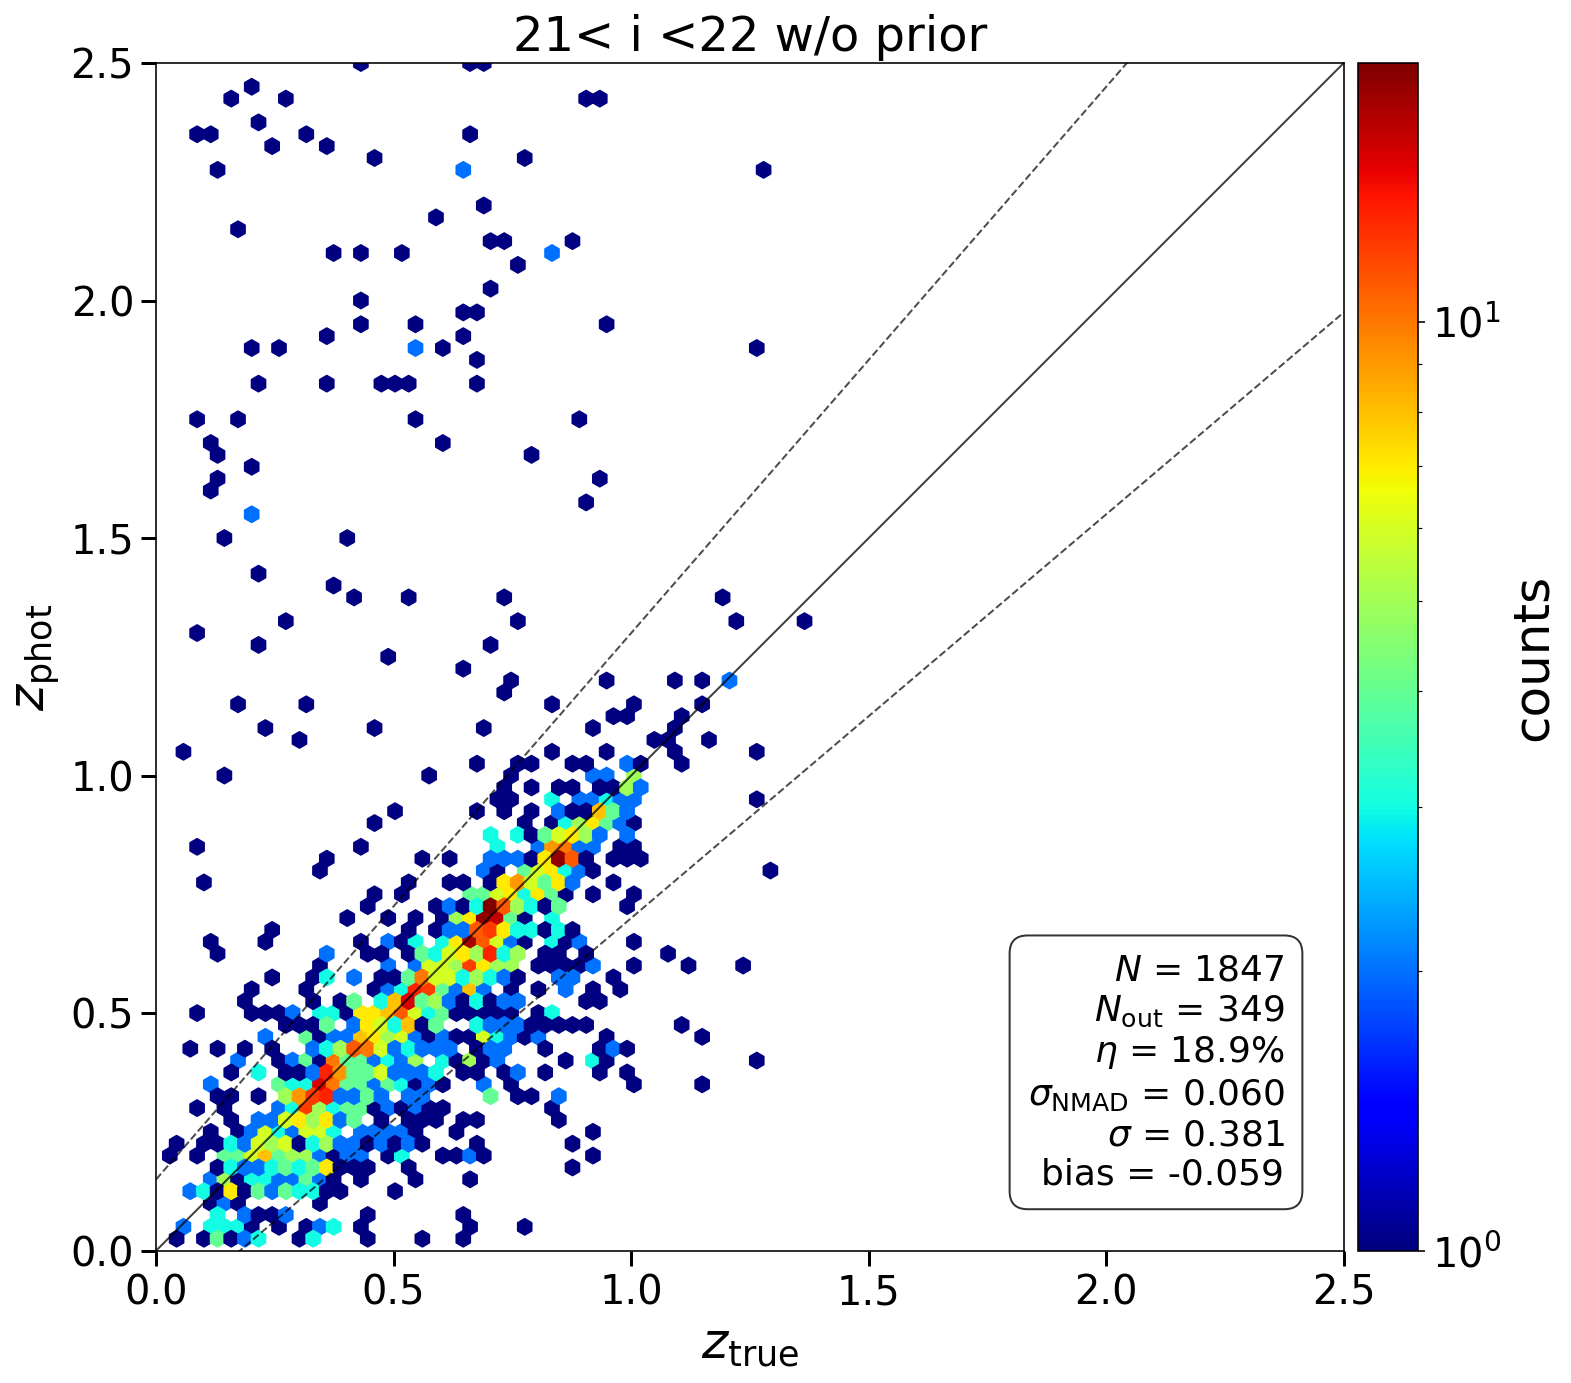

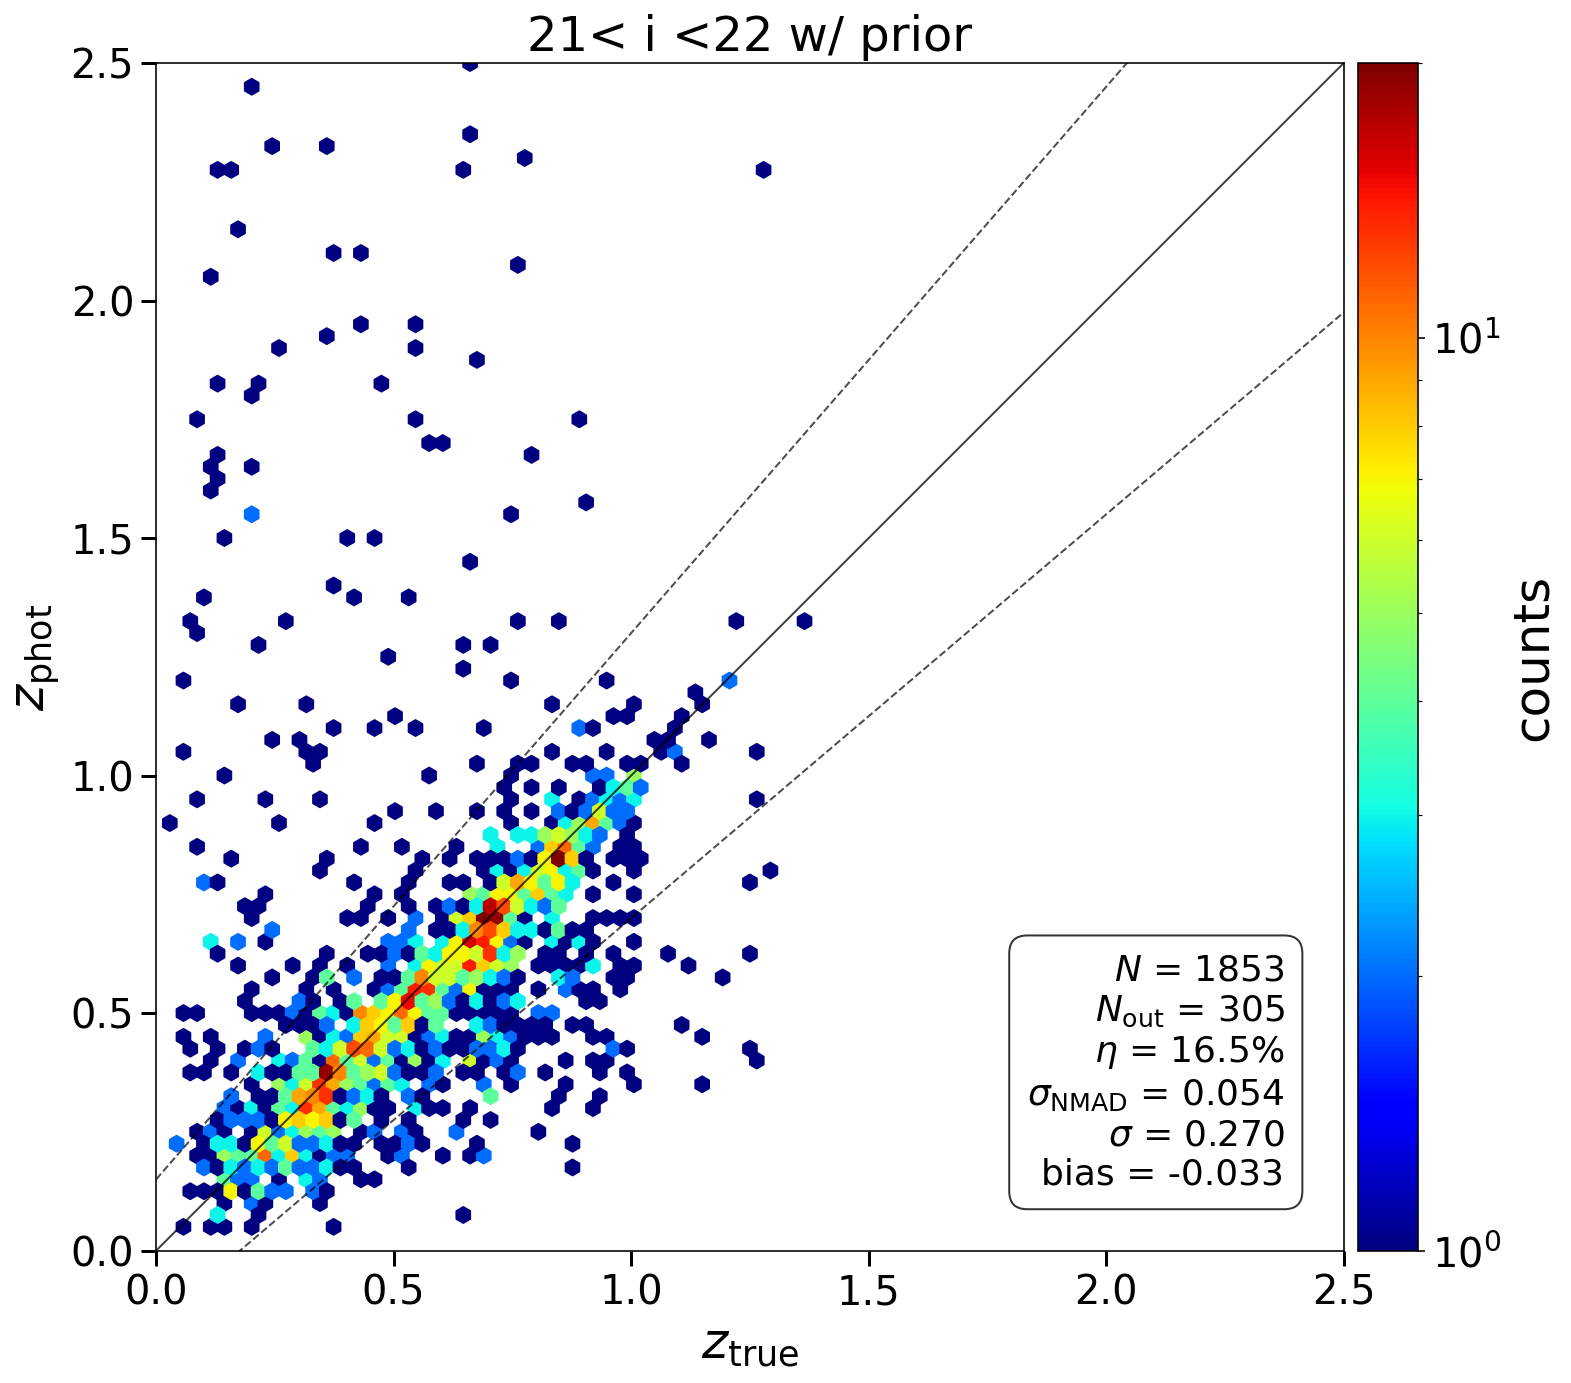

In [34]:
cat = Table.read(WD/f'data/fiducial102_reduced_i{imag:02d}.fits')
id_out = plot_comp_hexbin(cat['z_true'], ez.zbest, ez.chi2_best,
                          'Fig1-comp_z_eazypy.png', ez.idx,
                          label_x=r"$z_{\rm true}$", label_y=r"$z_{\rm phot}$",
                          title=f"{imag-1:02d}< i <{imag:02d} w/o prior",
                          xmin=0, xmax=2.5, cmap='jet',
                          scatter_plot=False, gridsize=(87,50), log_scale=False)

cat['z_phot'] = ez.zbest
cat['z_phot_chi2'] = ez.chi2_best
cat.write(dir_output/f'simple_output_i{imag:02d}_wo_prior.fits', overwrite=True)

ez.ZML_WITH_PRIOR = True
ez.fit_at_zbest(prior=True, nproc=1)

cat = Table.read(WD/f'data/fiducial102_reduced_i{imag:02d}.fits')
id_out = plot_comp_hexbin(cat['z_true'], ez.zbest, ez.chi2_best,
                          'Fig1-comp_z_eazypy.png', ez.idx,
                          label_x=r"$z_{\rm true}$", label_y=r"$z_{\rm phot}$",
                          title=f"{imag-1:02d}< i <{imag:02d} w/ prior",
                          xmin=0, xmax=2.5, cmap='jet',
                          scatter_plot=False, gridsize=(87,50), log_scale=False)

cat['z_phot'] = ez.zbest
cat['z_phot_chi2'] = ez.chi2_best
cat.write(dir_output/f'simple_output_i{imag:02d}_prior.fits', overwrite=True)

In [46]:
imag = 20

dir_output = WD/f"output_combined_i{imag:02d}"
dir_outfig = dir_output/f"outfig_i{imag:02d}"
if not dir_output.exists():
    dir_output.mkdir()
if not dir_outfig.exists():
    dir_outfig.mkdir()

params['OUTPUT_DIRECTORY']  = dir_output.as_posix()
params['MAIN_OUTPUT_FILE']  = f"output_i{imag:02d}"

params['TEMPLATE_COMBOS']   = 1
params['Z_STEP']            = 0.001

params['CATALOG_FILE']      = f"data/synphot_combined_i{imag:02d}.dat" 
params['FILTERS_RES']       = "FILTERS+spherex_reduced_fullband_halfband.res"
with open('tempfilt0001_comb.pickle', 'rb') as rfile:
    tempfilt = pickle.load(rfile)

# params['TEMPLATES_FILE']    = "BROWN_COSMOS.template"
params['TEMPLATES_FILE']    = "spherex_brown_cosmos.templates"
    
ez = eazy.photoz.PhotoZ(param_file=None, translate_file=translate_filename,
                        zeropoint_file=None, params=params, tempfilt=tempfilt, )
ez.fit_catalog(ez.idx, n_proc=1)
# ez.fit_single_templates()

Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: data/synphot_combined_i20.dat
   >>> NOBJ = 228
F419 E419 (419): SPHEREx_Band1_1
F420 E420 (420): SPHEREx_Band1_2
F421 E421 (421): SPHEREx_Band1_3
F422 E422 (422): SPHEREx_Band1_4
F423 E423 (423): SPHEREx_Band1_5
F424 E424 (424): SPHEREx_Band1_6
F425 E425 (425): SPHEREx_Band1_7
F426 E426 (426): SPHEREx_Band1_8
F427 E427 (427): SPHEREx_Band1_9
F428 E428 (428): SPHEREx_Band1_10
F429 E429 (429): SPHEREx_Band1_11
F430 E430 (430): SPHEREx_Band1_12
F431 E431 (431): SPHEREx_Band1_13
F432 E432 (432): SPHEREx_Band1_14
F433 E433 (433): SPHEREx_Band1_15
F434 E434 (434): SPHEREx_Band1_16
F435 E435 (435): SPHEREx_Band1_17
F436 E436 (436): SPHEREx_Band2_1
F437 E437 (437): SPHEREx_Band2_2
F438 E438 (438): SPHEREx_Band2_3
F439 E439 (439): SPHEREx_Band2_4
F440 E440 (440): SPHEREx_Band2_5
F441 E441 (441): SPHEREx_Band2_6
F442 E442 (442): SPHEREx_Band2_7
F443 E443 (443): SPHEREx_Ba

Set sys_err = 0.01 (positive=True)
Read PRIOR_FILE:  ../prior_K_TAO.dat


1903it [00:00, 4257.75it/s]
100%|██████████| 1903/1903 [07:29<00:00,  4.23it/s]


Compute best fits
fit_best: 0.5 s (n_proc=1,  NOBJ=225)
Fit 451.0 s (n_proc=1, NOBJ=228)


Objects : 225
Outliers: 0


fit_best: 0.3 s (n_proc=1,  NOBJ=227)
Objects : 227
Outliers: 0




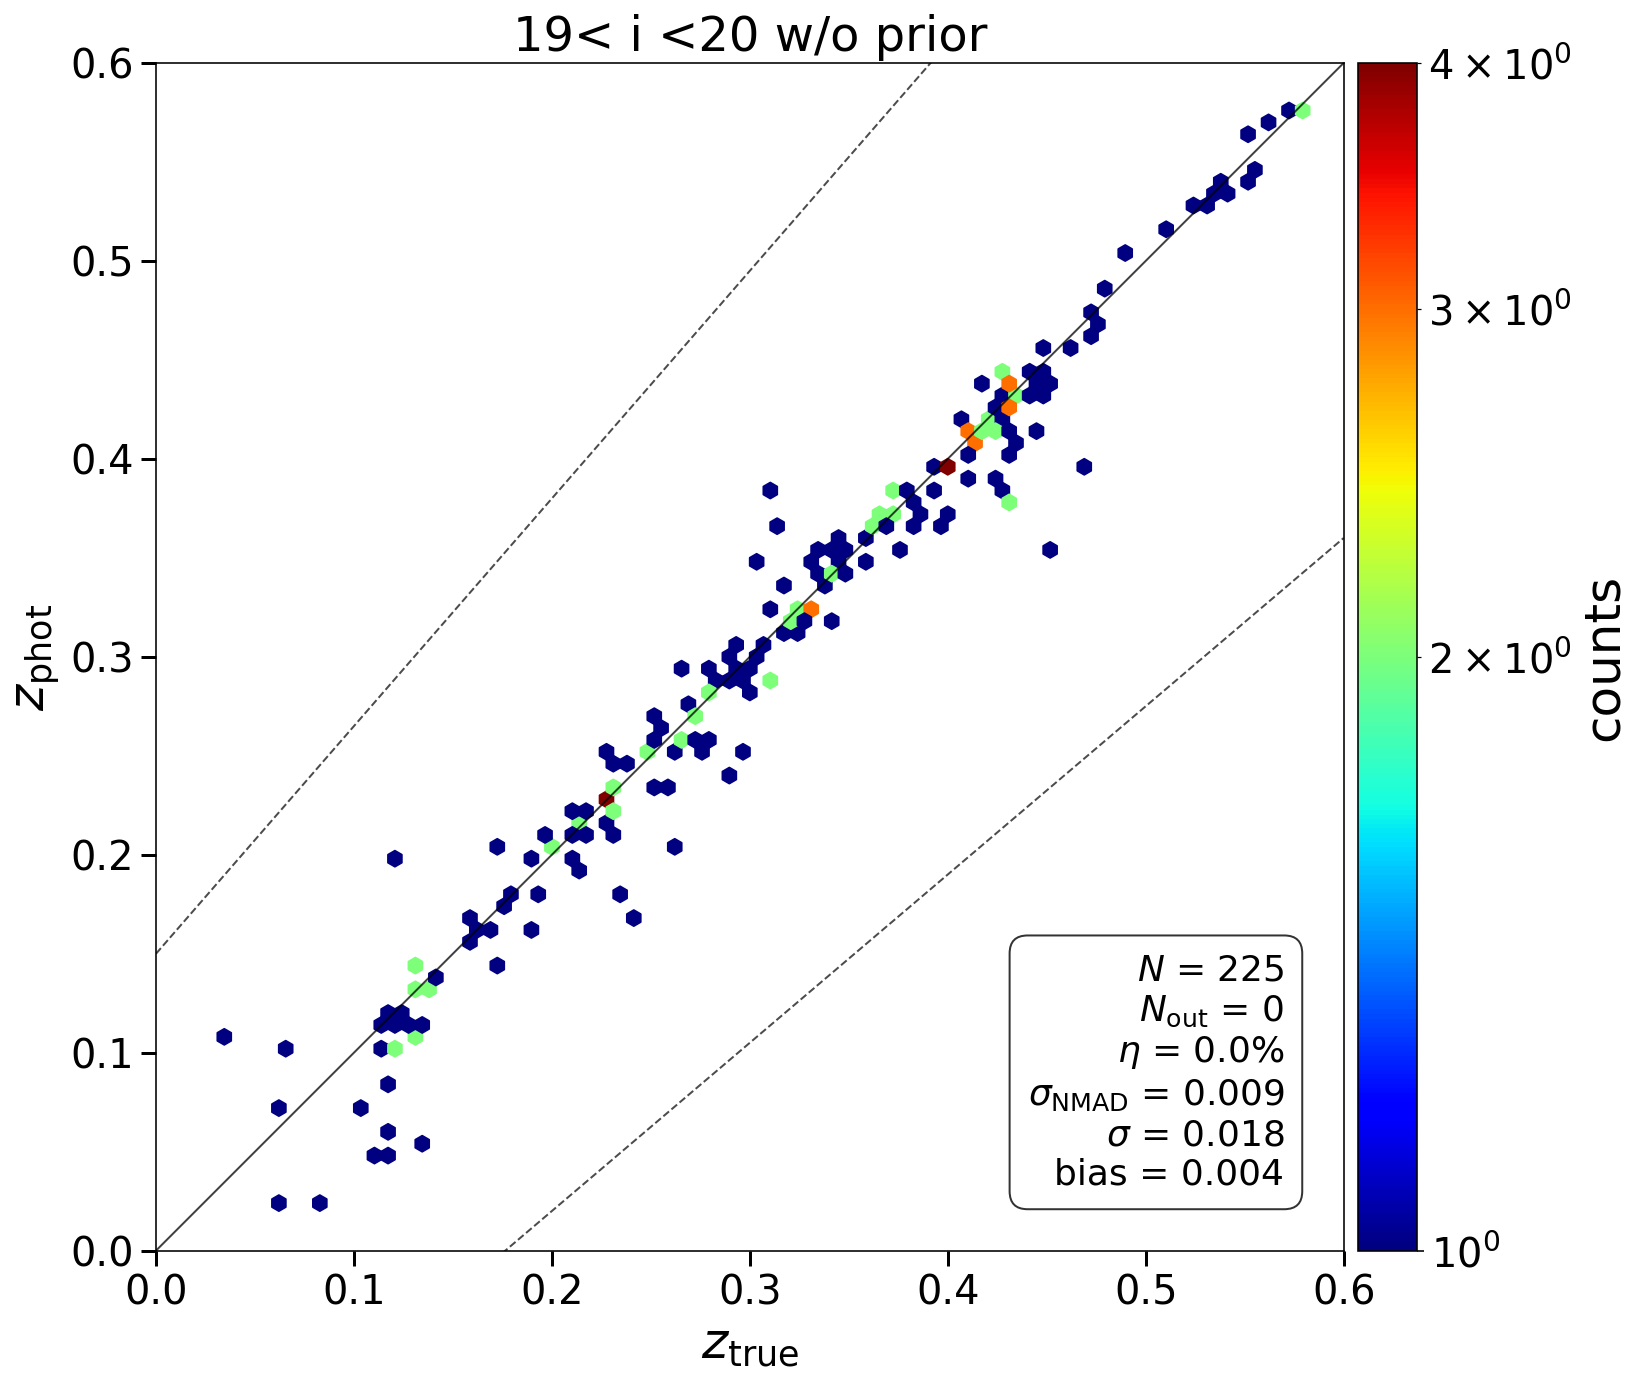

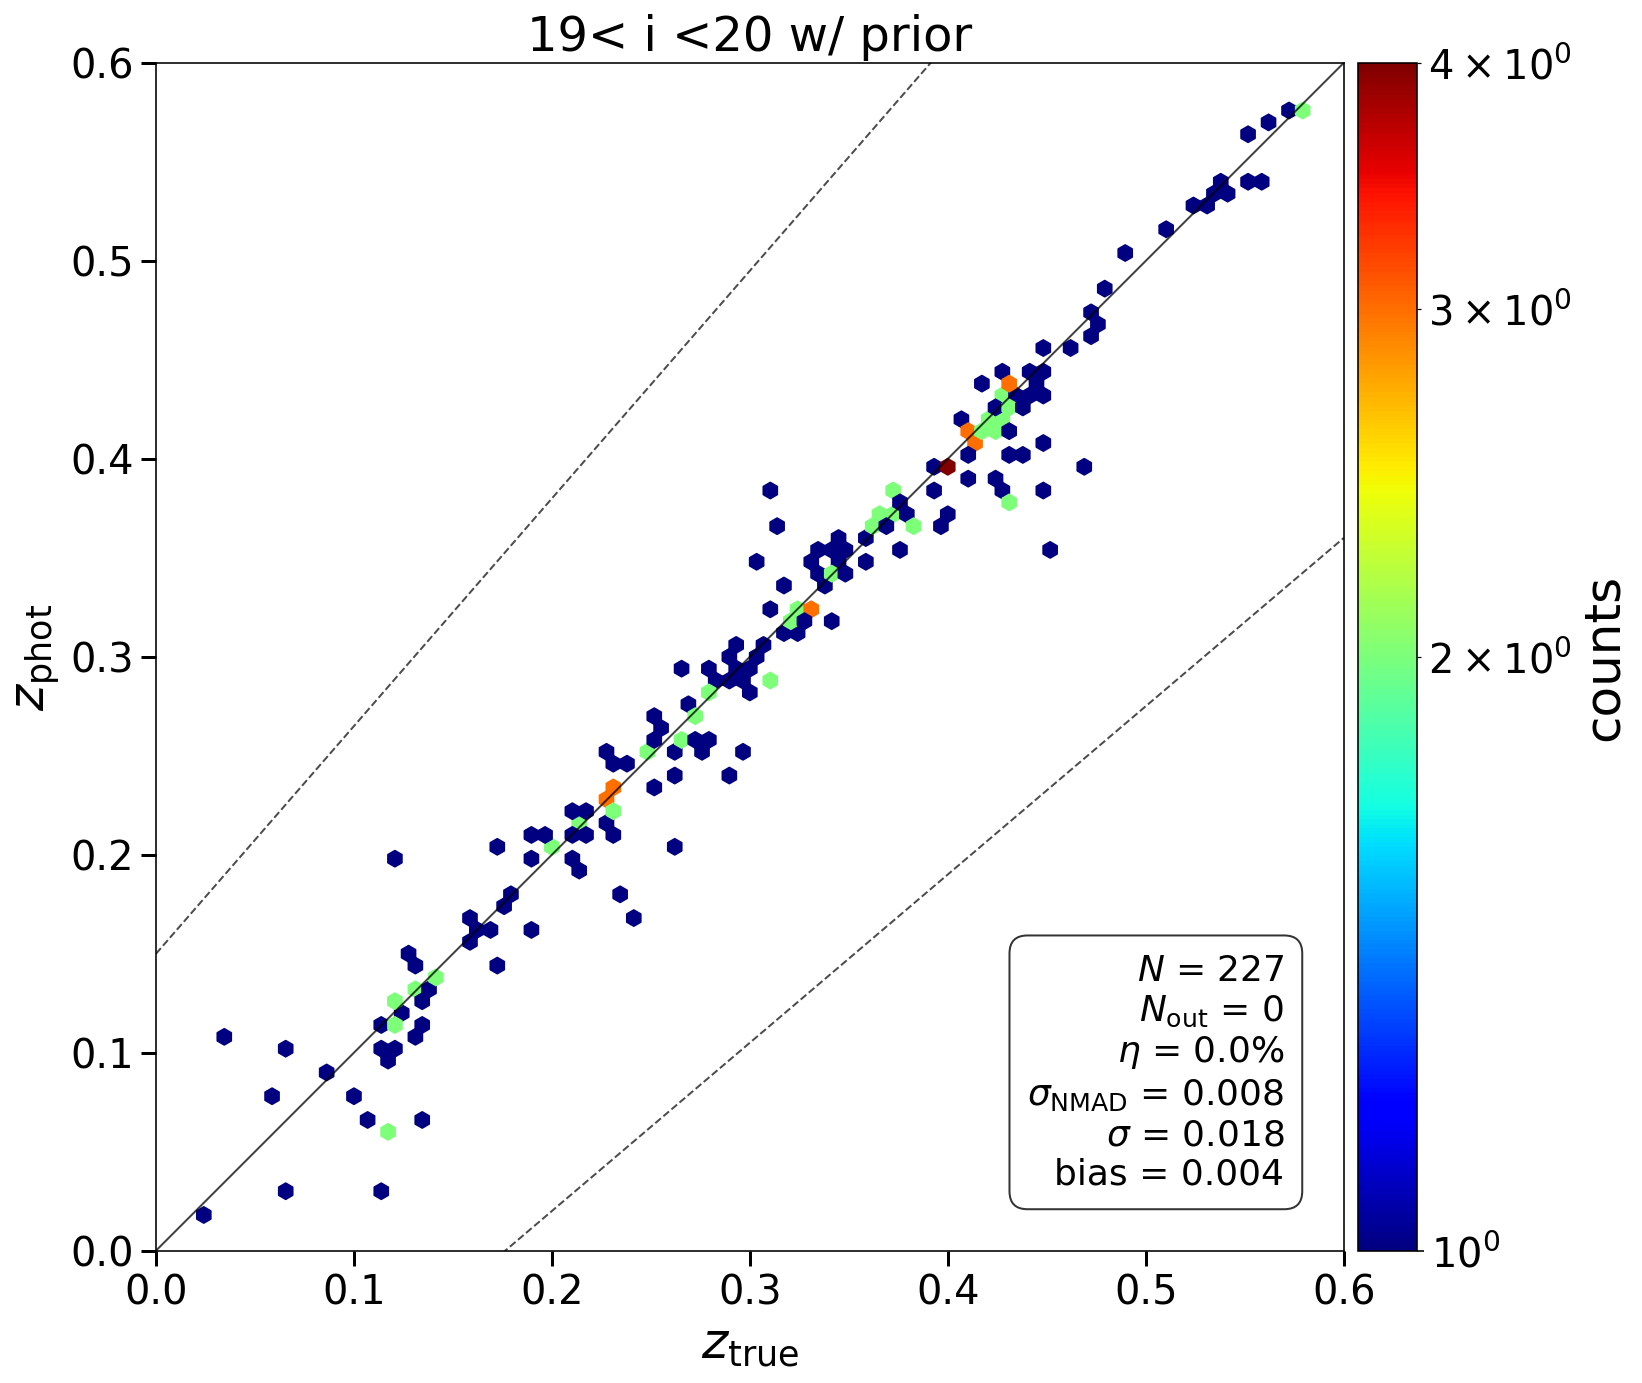

In [47]:
cat = Table.read(WD/f'data/fiducial102_reduced_i{imag:02d}.fits')
id_out = plot_comp_hexbin(cat['z_true'], ez.zbest, ez.chi2_best,
                          'Fig1-comp_z_eazypy.png', ez.idx,
                          label_x=r"$z_{\rm true}$", label_y=r"$z_{\rm phot}$",
                          title=f"{imag-1:02d}< i <{imag:02d} w/o prior",
                          xmin=0, xmax=0.6, cmap='jet',
                          scatter_plot=False, gridsize=(87,50), log_scale=False)

cat['z_phot'] = ez.zbest
cat['z_phot_chi2'] = ez.chi2_best
cat.write(dir_output/f'simple_output_i{imag:02d}_wo_prior.fits', overwrite=True)

ez.ZML_WITH_PRIOR = True
ez.fit_at_zbest(prior=True, nproc=1)

cat = Table.read(WD/f'data/fiducial102_reduced_i{imag:02d}.fits')
id_out = plot_comp_hexbin(cat['z_true'], ez.zbest, ez.chi2_best,
                          'Fig1-comp_z_eazypy.png', ez.idx,
                          label_x=r"$z_{\rm true}$", label_y=r"$z_{\rm phot}$",
                          title=f"{imag-1:02d}< i <{imag:02d} w/ prior",
                          xmin=0, xmax=0.6, cmap='jet',
                          scatter_plot=False, gridsize=(87,50), log_scale=False)

cat['z_phot'] = ez.zbest
cat['z_phot_chi2'] = ez.chi2_best
cat.write(dir_output/f'simple_output_i{imag:02d}_prior.fits', overwrite=True)

In [48]:
imag = 21

dir_output = WD/f"output_combined_i{imag:02d}"
dir_outfig = dir_output/f"outfig_i{imag:02d}"
if not dir_output.exists():
    dir_output.mkdir()
if not dir_outfig.exists():
    dir_outfig.mkdir()

params['OUTPUT_DIRECTORY']  = dir_output.as_posix()
params['MAIN_OUTPUT_FILE']  = f"output_i{imag:02d}"

params['TEMPLATE_COMBOS']   = 1
params['Z_STEP']            = 0.001

params['CATALOG_FILE']      = f"data/synphot_combined_i{imag:02d}.dat" 
params['FILTERS_RES']       = "FILTERS+spherex_reduced_fullband_halfband.res"
with open('tempfilt0001_comb.pickle', 'rb') as rfile:
    tempfilt = pickle.load(rfile)

# params['TEMPLATES_FILE']    = "BROWN_COSMOS.template"
params['TEMPLATES_FILE']    = "spherex_brown_cosmos.templates"
    
ez = eazy.photoz.PhotoZ(param_file=None, translate_file=translate_filename,
                        zeropoint_file=None, params=params, tempfilt=tempfilt, )
ez.fit_catalog(ez.idx, n_proc=1)
# ez.fit_single_templates()

Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: data/synphot_combined_i21.dat
   >>> NOBJ = 662
F419 E419 (419): SPHEREx_Band1_1
F420 E420 (420): SPHEREx_Band1_2
F421 E421 (421): SPHEREx_Band1_3
F422 E422 (422): SPHEREx_Band1_4
F423 E423 (423): SPHEREx_Band1_5
F424 E424 (424): SPHEREx_Band1_6
F425 E425 (425): SPHEREx_Band1_7
F426 E426 (426): SPHEREx_Band1_8
F427 E427 (427): SPHEREx_Band1_9
F428 E428 (428): SPHEREx_Band1_10
F429 E429 (429): SPHEREx_Band1_11
F430 E430 (430): SPHEREx_Band1_12
F431 E431 (431): SPHEREx_Band1_13
F432 E432 (432): SPHEREx_Band1_14
F433 E433 (433): SPHEREx_Band1_15
F434 E434 (434): SPHEREx_Band1_16
F435 E435 (435): SPHEREx_Band1_17
F436 E436 (436): SPHEREx_Band2_1
F437 E437 (437): SPHEREx_Band2_2
F438 E438 (438): SPHEREx_Band2_3
F439 E439 (439): SPHEREx_Band2_4
F440 E440 (440): SPHEREx_Band2_5
F441 E441 (441): SPHEREx_Band2_6
F442 E442 (442): SPHEREx_Band2_7
F443 E443 (443): SPHEREx_Ba

/data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/photoz.py:1326: RuntimeWarning: invalid value encountered in log10
  self.prior_mag_cat += -2.5*np.log10(np.squeeze(self.fnu[:,ix]))


Set sys_err = 0.01 (positive=True)
Read PRIOR_FILE:  ../prior_K_TAO.dat


1903it [00:01, 1365.89it/s]
100%|██████████| 1903/1903 [21:04<00:00,  1.50it/s]


Compute best fits
fit_best: 1.3 s (n_proc=1,  NOBJ=658)
Fit 1267.3 s (n_proc=1, NOBJ=662)


Objects : 658
Outliers: 11


fit_best: 1.3 s (n_proc=1,  NOBJ=660)
Objects : 660
Outliers: 11




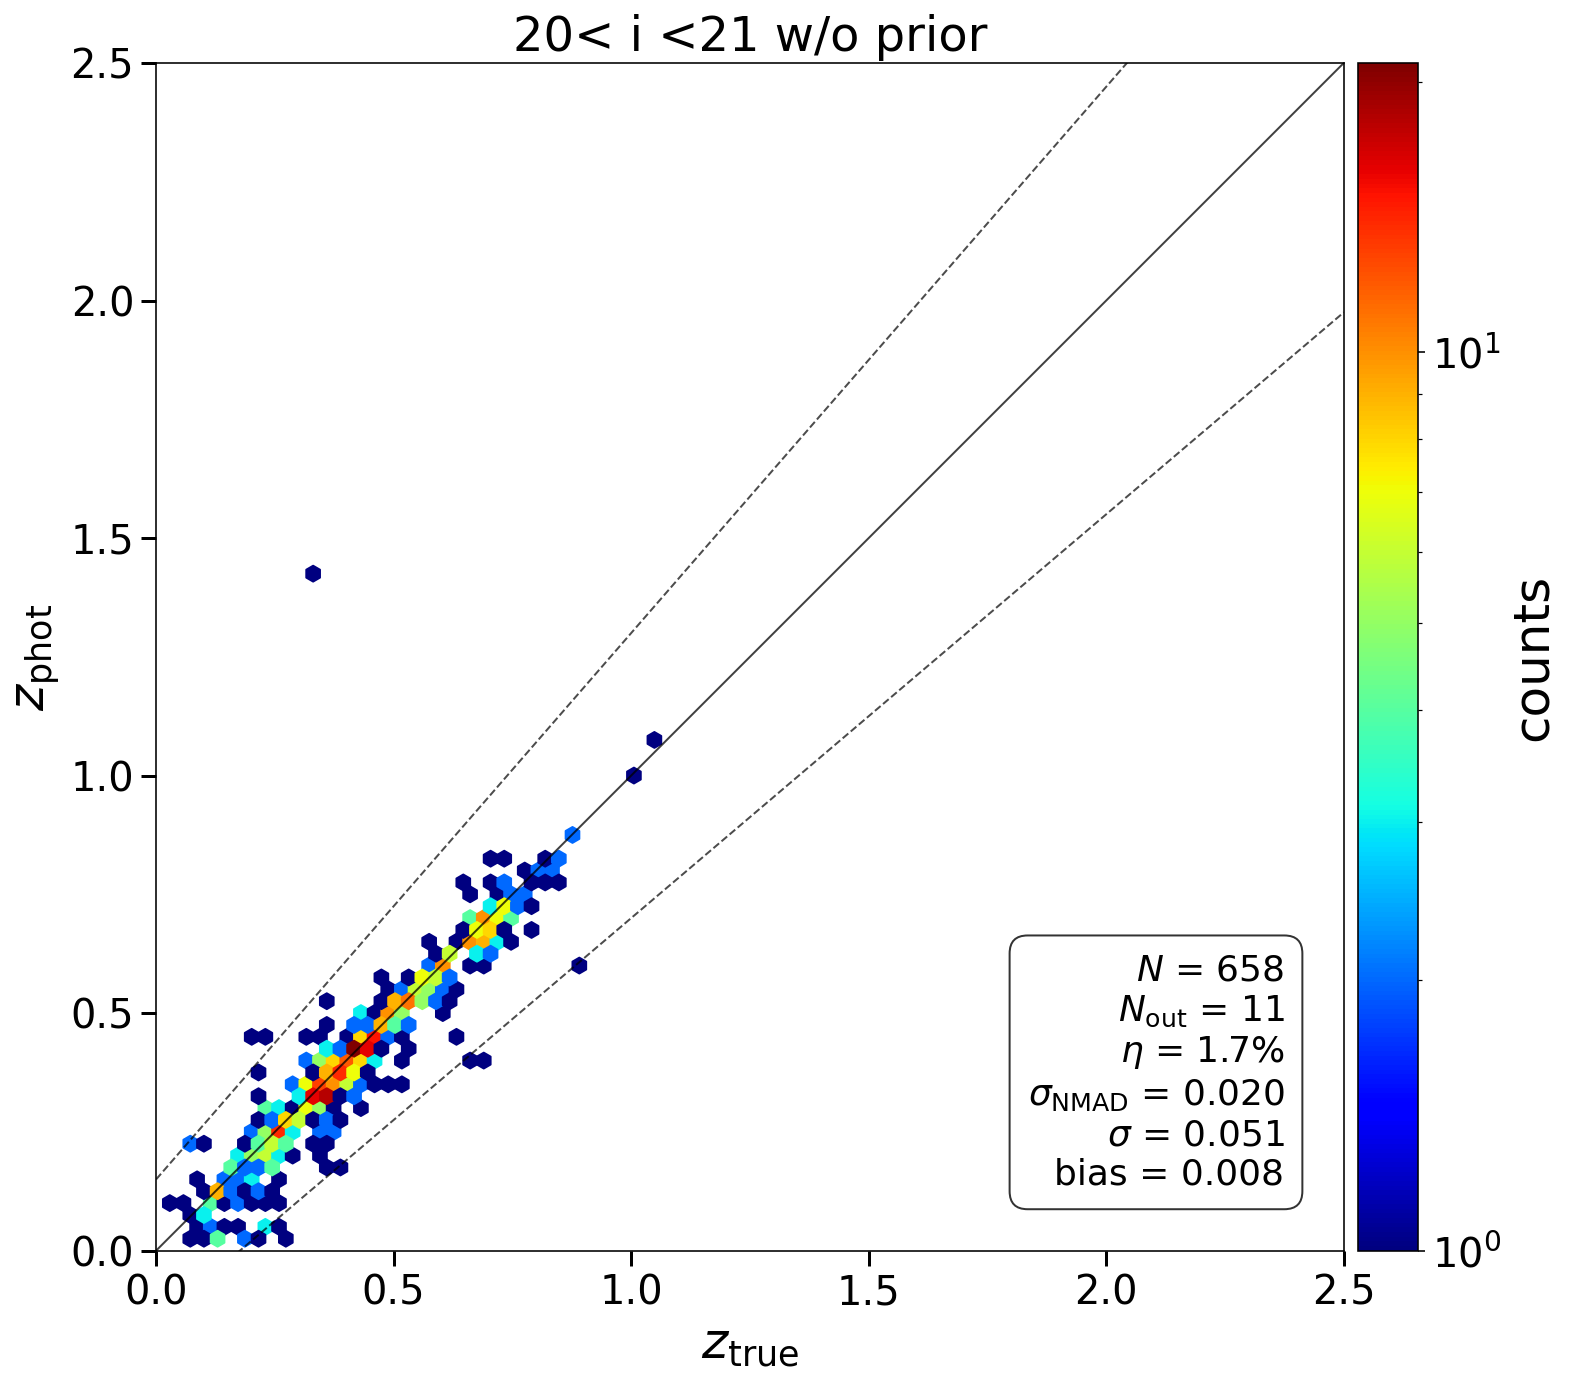

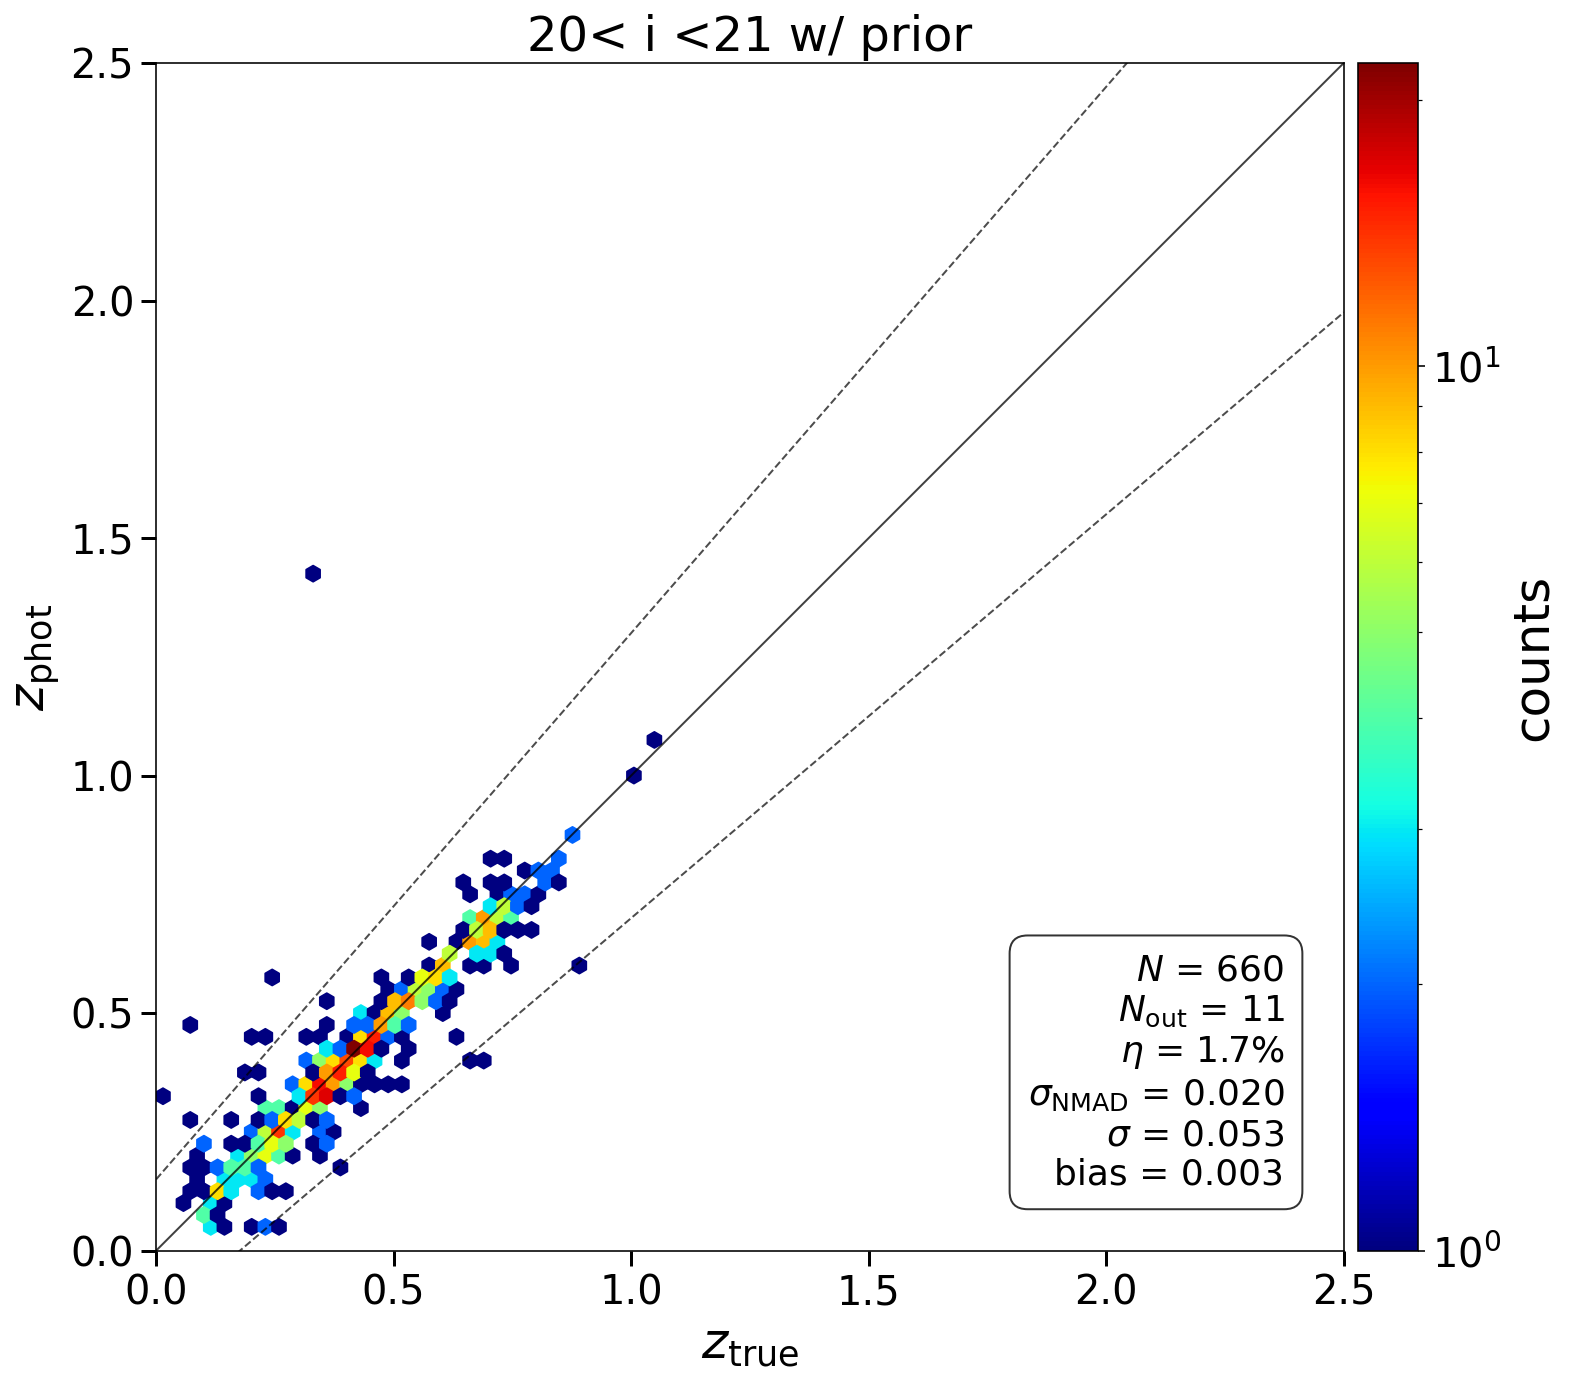

In [49]:
cat = Table.read(WD/f'data/fiducial102_reduced_i{imag:02d}.fits')
id_out = plot_comp_hexbin(cat['z_true'], ez.zbest, ez.chi2_best,
                          'Fig1-comp_z_eazypy.png', ez.idx,
                          label_x=r"$z_{\rm true}$", label_y=r"$z_{\rm phot}$",
                          title=f"{imag-1:02d}< i <{imag:02d} w/o prior",
                          xmin=0, xmax=2.5, cmap='jet',
                          scatter_plot=False, gridsize=(87,50), log_scale=False)

cat['z_phot'] = ez.zbest
cat['z_phot_chi2'] = ez.chi2_best
cat.write(dir_output/f'simple_output_i{imag:02d}_wo_prior.fits', overwrite=True)

ez.ZML_WITH_PRIOR = True
ez.fit_at_zbest(prior=True, nproc=1)

cat = Table.read(WD/f'data/fiducial102_reduced_i{imag:02d}.fits')
id_out = plot_comp_hexbin(cat['z_true'], ez.zbest, ez.chi2_best,
                          'Fig1-comp_z_eazypy.png', ez.idx,
                          label_x=r"$z_{\rm true}$", label_y=r"$z_{\rm phot}$",
                          title=f"{imag-1:02d}< i <{imag:02d} w/ prior",
                          xmin=0, xmax=2.5, cmap='jet',
                          scatter_plot=False, gridsize=(87,50), log_scale=False)

cat['z_phot'] = ez.zbest
cat['z_phot_chi2'] = ez.chi2_best
cat.write(dir_output/f'simple_output_i{imag:02d}_prior.fits', overwrite=True)

In [51]:
imag = 21
params['CATALOG_FILE']      = f"data/synphot_i{imag:02d}.dat" 

dir_output = WD/f"output_i{imag:02d}"
dir_outfig = dir_output/f"outfig_i{imag:02d}"
if not dir_output.exists():
    dir_output.mkdir()
if not dir_outfig.exists():
    dir_outfig.mkdir()

params['OUTPUT_DIRECTORY']  = dir_output.as_posix()
params['MAIN_OUTPUT_FILE']  = f"output_i{imag:02d}"

params['TEMPLATE_COMBOS']   = 1
params['Z_STEP']            = 0.003

with open('tempfilt0003.pickle', 'rb') as rfile:
    tempfilt = pickle.load(rfile)

# params['TEMPLATES_FILE']    = "BROWN_COSMOS.template"
params['TEMPLATES_FILE']    = "spherex_brown_cosmos.templates"
    
ez = eazy.photoz.PhotoZ(param_file=None, translate_file=translate_filename,
                        zeropoint_file=None, params=params, tempfilt=tempfilt, )
ez.fit_catalog(ez.idx, n_proc=1)

Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: data/synphot_i21.dat
   >>> NOBJ = 662
F419 E419 (419): SPHEREx_Band1_1
F420 E420 (420): SPHEREx_Band1_2
F421 E421 (421): SPHEREx_Band1_3
F422 E422 (422): SPHEREx_Band1_4
F423 E423 (423): SPHEREx_Band1_5
F424 E424 (424): SPHEREx_Band1_6
F425 E425 (425): SPHEREx_Band1_7
F426 E426 (426): SPHEREx_Band1_8
F427 E427 (427): SPHEREx_Band1_9
F428 E428 (428): SPHEREx_Band1_10
F429 E429 (429): SPHEREx_Band1_11
F430 E430 (430): SPHEREx_Band1_12
F431 E431 (431): SPHEREx_Band1_13
F432 E432 (432): SPHEREx_Band1_14
F433 E433 (433): SPHEREx_Band1_15
F434 E434 (434): SPHEREx_Band1_16
F435 E435 (435): SPHEREx_Band1_17
F436 E436 (436): SPHEREx_Band2_1
F437 E437 (437): SPHEREx_Band2_2
F438 E438 (438): SPHEREx_Band2_3
F439 E439 (439): SPHEREx_Band2_4
F440 E440 (440): SPHEREx_Band2_5
F441 E441 (441): SPHEREx_Band2_6
F442 E442 (442): SPHEREx_Band2_7
F443 E443 (443): SPHEREx_Band2_8
F44

635it [00:00, 1550.69it/s]
100%|██████████| 635/635 [06:00<00:00,  1.76it/s]


Compute best fits
fit_best: 1.2 s (n_proc=1,  NOBJ=660)
Fit 362.0 s (n_proc=1, NOBJ=662)


fit_best: 0.8 s (n_proc=1,  NOBJ=660)
Objects : 660
Outliers: 10


fit_best: 0.8 s (n_proc=1,  NOBJ=662)
Objects : 662
Outliers: 18




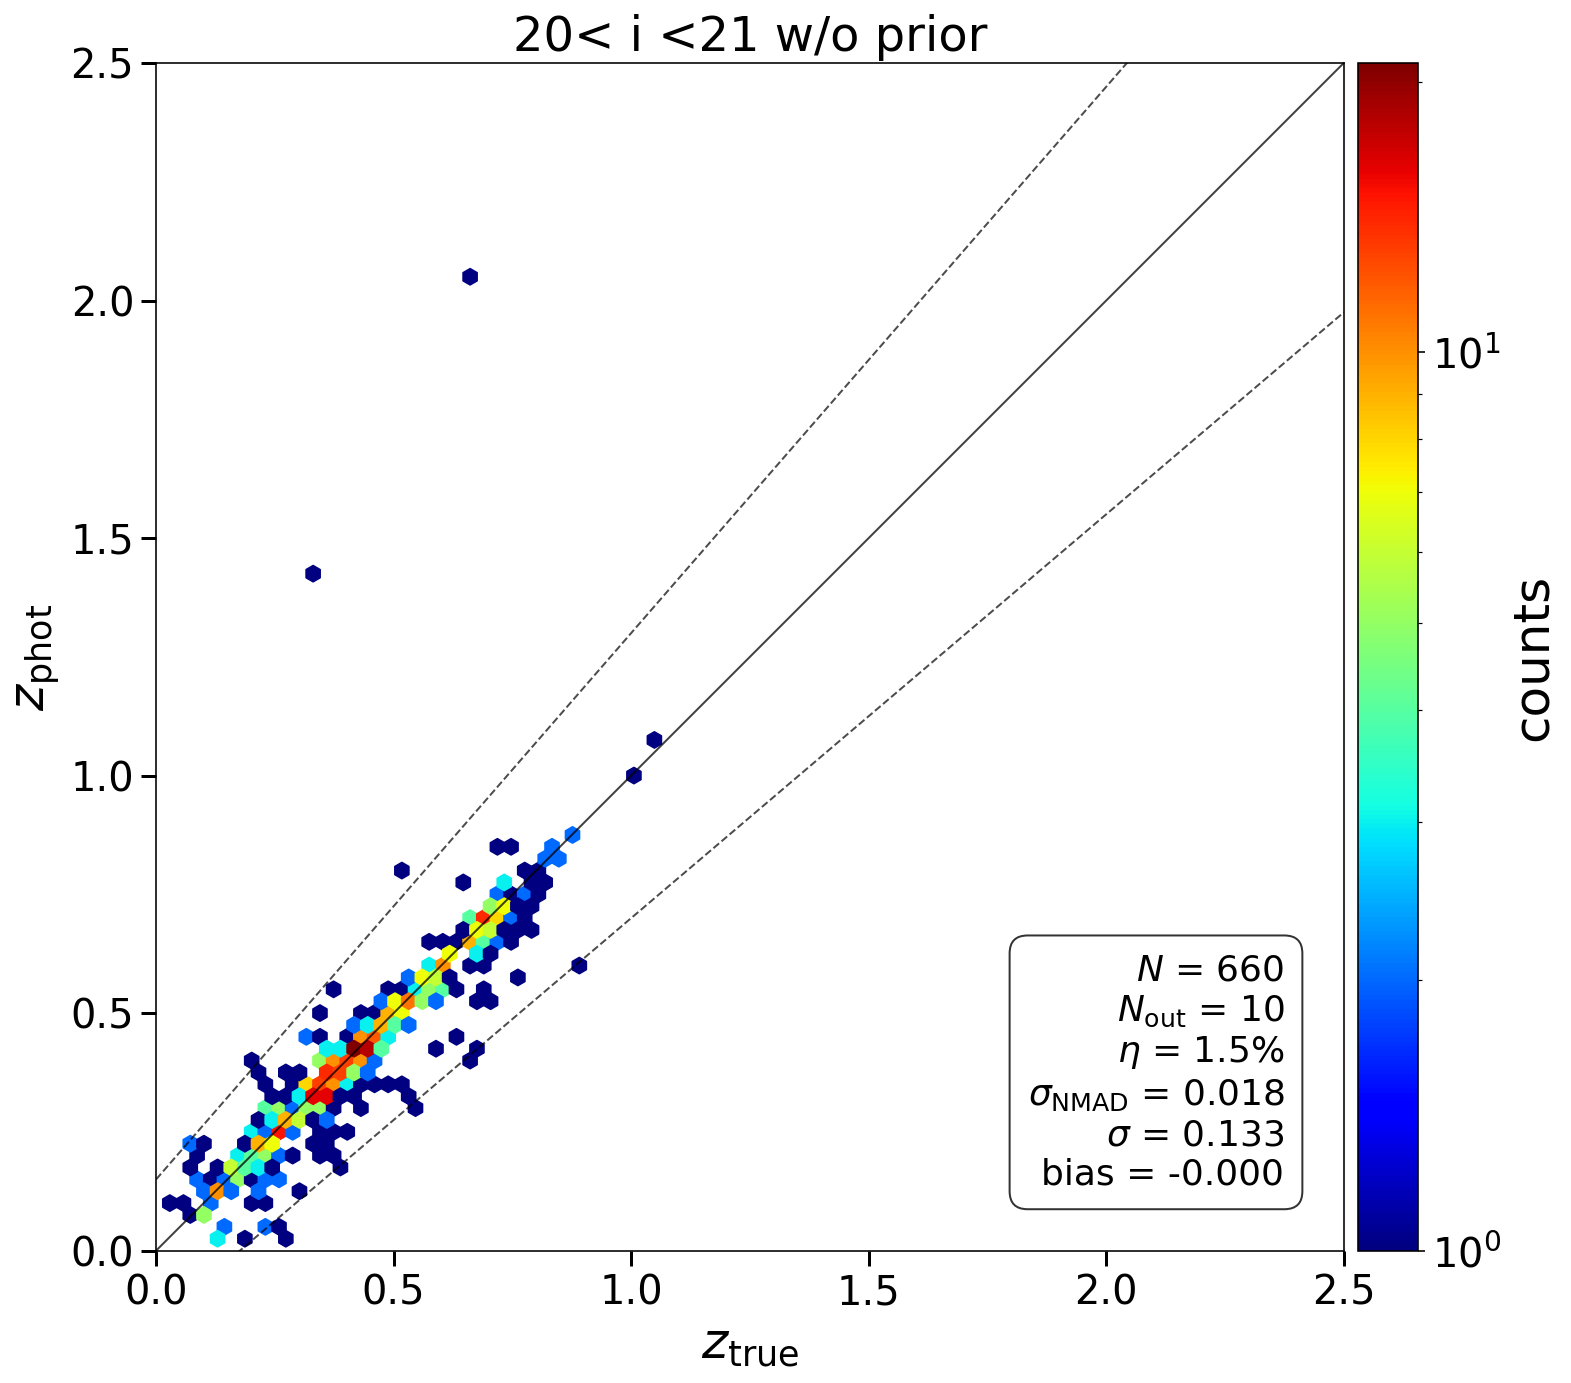

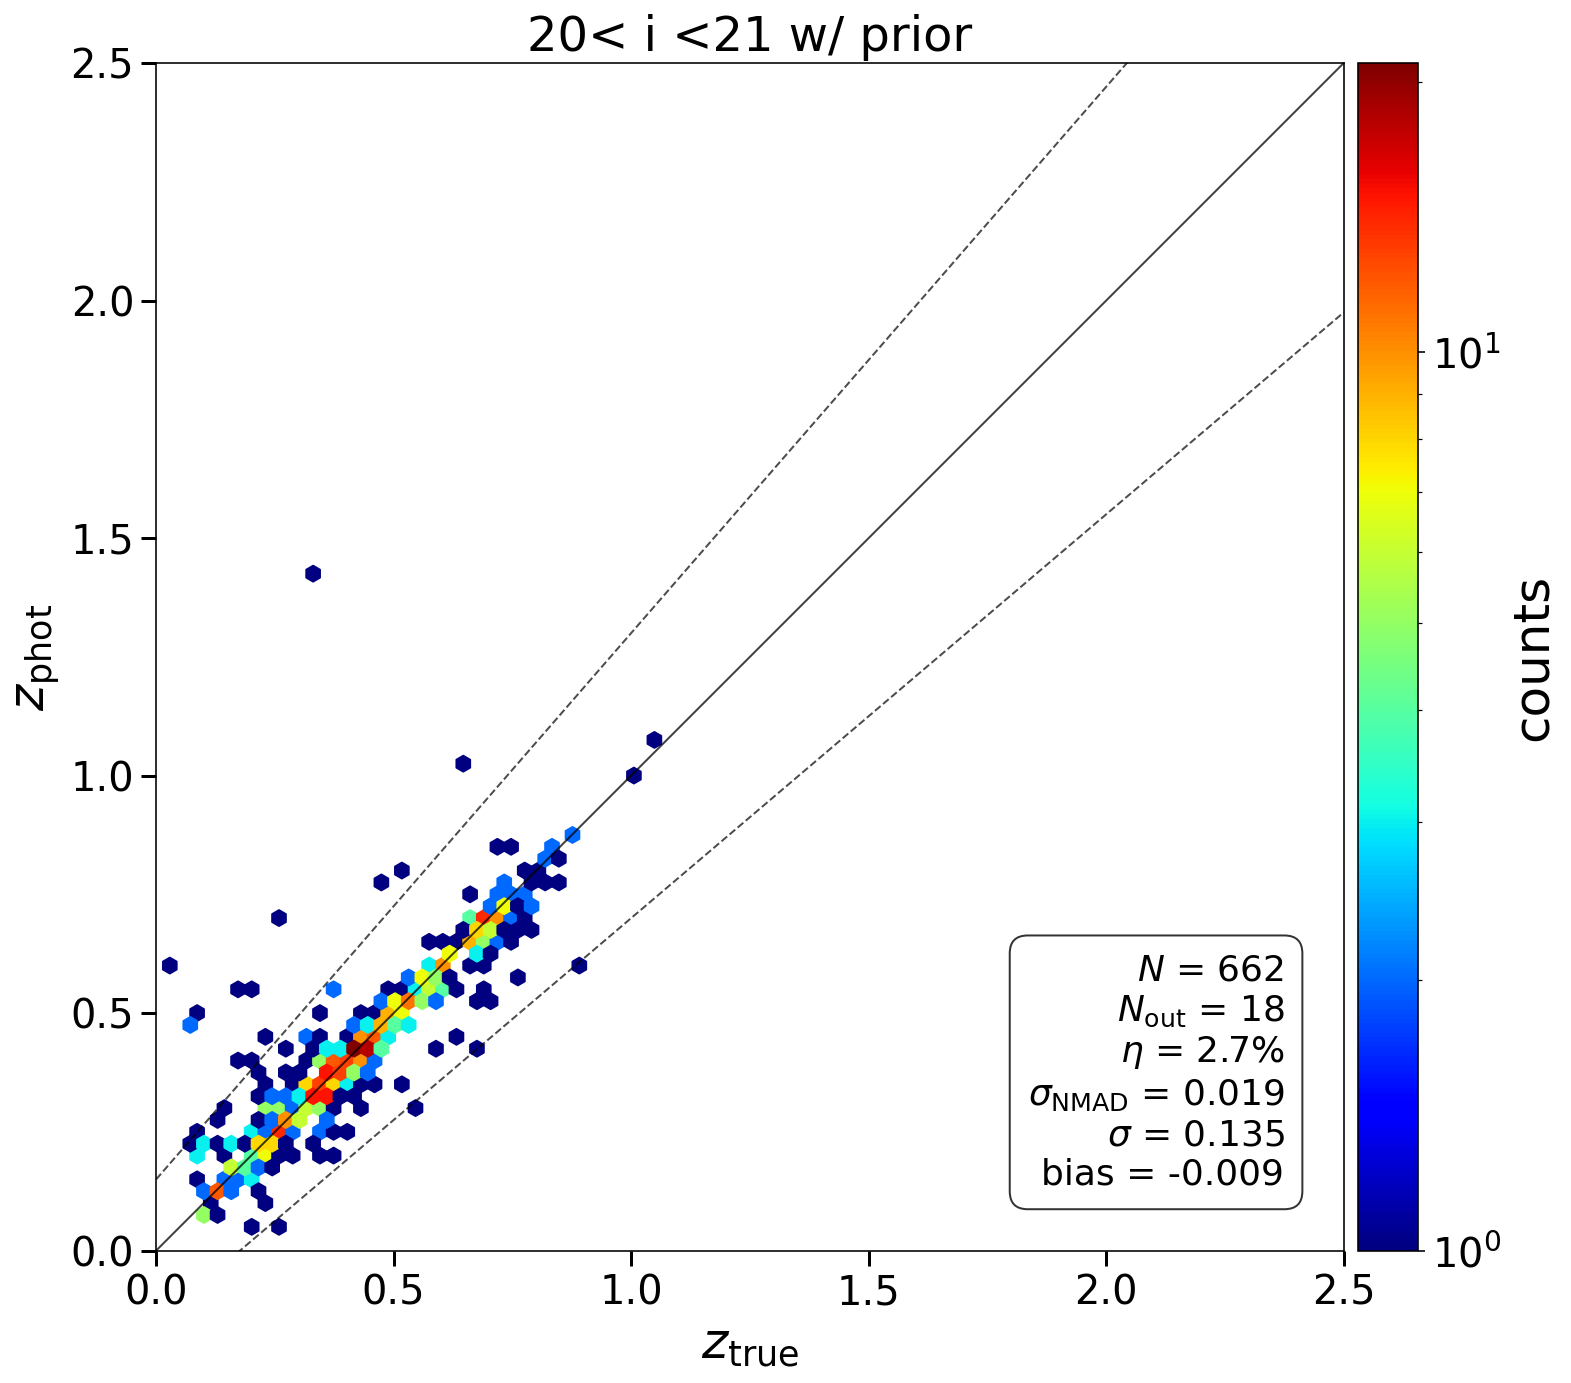

In [53]:
ez.ZML_WITH_PRIOR = False
ez.fit_at_zbest(prior=False, nproc=1)
cat = Table.read(WD/f'data/fiducial102_reduced_i{imag:02d}.fits')
id_out = plot_comp_hexbin(cat['z_true'], ez.zbest, ez.chi2_best,
                          'Fig1-comp_z_eazypy.png', ez.idx,
                          label_x=r"$z_{\rm true}$", label_y=r"$z_{\rm phot}$",
                          title=f"{imag-1:02d}< i <{imag:02d} w/o prior",
                          xmin=0, xmax=2.5, cmap='jet',
                          scatter_plot=False, gridsize=(87,50), log_scale=False)

cat['z_phot'] = ez.zbest
cat['z_phot_chi2'] = ez.chi2_best
cat.write(dir_output/f'simple_output_i{imag:02d}_wo_prior.fits', overwrite=True)

ez.ZML_WITH_PRIOR = True
ez.fit_at_zbest(prior=True, nproc=1)

cat = Table.read(WD/f'data/fiducial102_reduced_i{imag:02d}.fits')
id_out = plot_comp_hexbin(cat['z_true'], ez.zbest, ez.chi2_best,
                          'Fig1-comp_z_eazypy.png', ez.idx,
                          label_x=r"$z_{\rm true}$", label_y=r"$z_{\rm phot}$",
                          title=f"{imag-1:02d}< i <{imag:02d} w/ prior",
                          xmin=0, xmax=2.5, cmap='jet',
                          scatter_plot=False, gridsize=(87,50), log_scale=False)

cat['z_phot'] = ez.zbest
cat['z_phot_chi2'] = ez.chi2_best
cat.write(dir_output/f'simple_output_i{imag:02d}_prior.fits', overwrite=True)

In [54]:
imag = 19
params['CATALOG_FILE']      = f"data/synphot_i{imag:02d}.dat" 

dir_output = WD/f"output_i{imag:02d}"
dir_outfig = dir_output/f"outfig_i{imag:02d}"
if not dir_output.exists():
    dir_output.mkdir()
if not dir_outfig.exists():
    dir_outfig.mkdir()

params['OUTPUT_DIRECTORY']  = dir_output.as_posix()
params['MAIN_OUTPUT_FILE']  = f"output_i{imag:02d}"

params['TEMPLATE_COMBOS']   = 1
params['Z_STEP']            = 0.003

with open('tempfilt0003.pickle', 'rb') as rfile:
    tempfilt = pickle.load(rfile)

# params['TEMPLATES_FILE']    = "BROWN_COSMOS.template"
params['TEMPLATES_FILE']    = "spherex_brown_cosmos.templates"
    
ez = eazy.photoz.PhotoZ(param_file=None, translate_file=translate_filename,
                        zeropoint_file=None, params=params, tempfilt=tempfilt, )
ez.fit_catalog(ez.idx, n_proc=1)

Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: data/synphot_i19.dat
   >>> NOBJ = 73
F419 E419 (419): SPHEREx_Band1_1
F420 E420 (420): SPHEREx_Band1_2
F421 E421 (421): SPHEREx_Band1_3
F422 E422 (422): SPHEREx_Band1_4
F423 E423 (423): SPHEREx_Band1_5
F424 E424 (424): SPHEREx_Band1_6
F425 E425 (425): SPHEREx_Band1_7
F426 E426 (426): SPHEREx_Band1_8
F427 E427 (427): SPHEREx_Band1_9
F428 E428 (428): SPHEREx_Band1_10
F429 E429 (429): SPHEREx_Band1_11
F430 E430 (430): SPHEREx_Band1_12
F431 E431 (431): SPHEREx_Band1_13
F432 E432 (432): SPHEREx_Band1_14
F433 E433 (433): SPHEREx_Band1_15
F434 E434 (434): SPHEREx_Band1_16
F435 E435 (435): SPHEREx_Band1_17
F436 E436 (436): SPHEREx_Band2_1
F437 E437 (437): SPHEREx_Band2_2
F438 E438 (438): SPHEREx_Band2_3
F439 E439 (439): SPHEREx_Band2_4
F440 E440 (440): SPHEREx_Band2_5
F441 E441 (441): SPHEREx_Band2_6
F442 E442 (442): SPHEREx_Band2_7
F443 E443 (443): SPHEREx_Band2_8
F444

635it [00:00, 11582.95it/s]
100%|██████████| 635/635 [00:30<00:00, 20.72it/s]


Compute best fits
fit_best: 0.1 s (n_proc=1,  NOBJ=72)
Fit 31.2 s (n_proc=1, NOBJ=73)


fit_best: 0.1 s (n_proc=1,  NOBJ=72)
Objects : 72
Outliers: 0


fit_best: 0.1 s (n_proc=1,  NOBJ=72)
Objects : 72
Outliers: 0




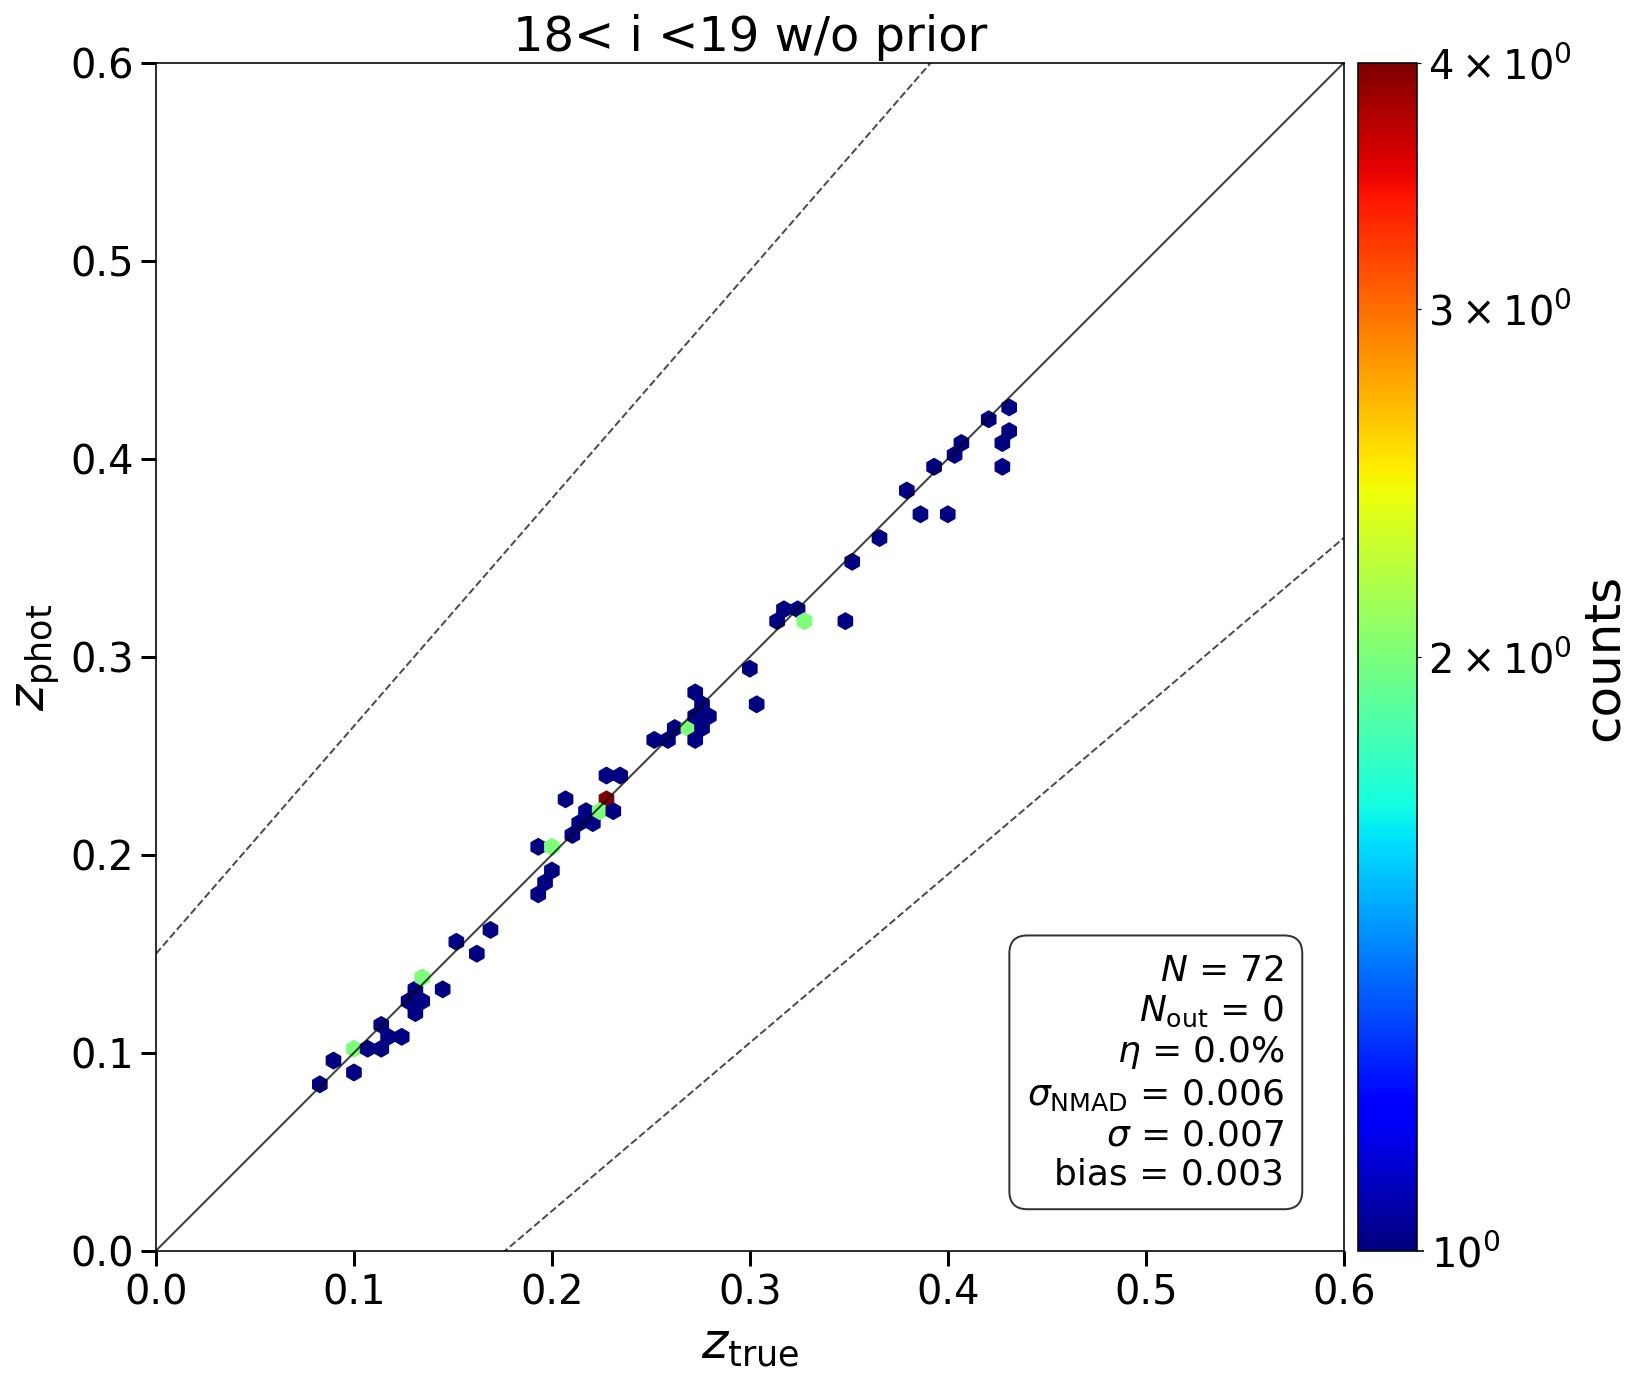

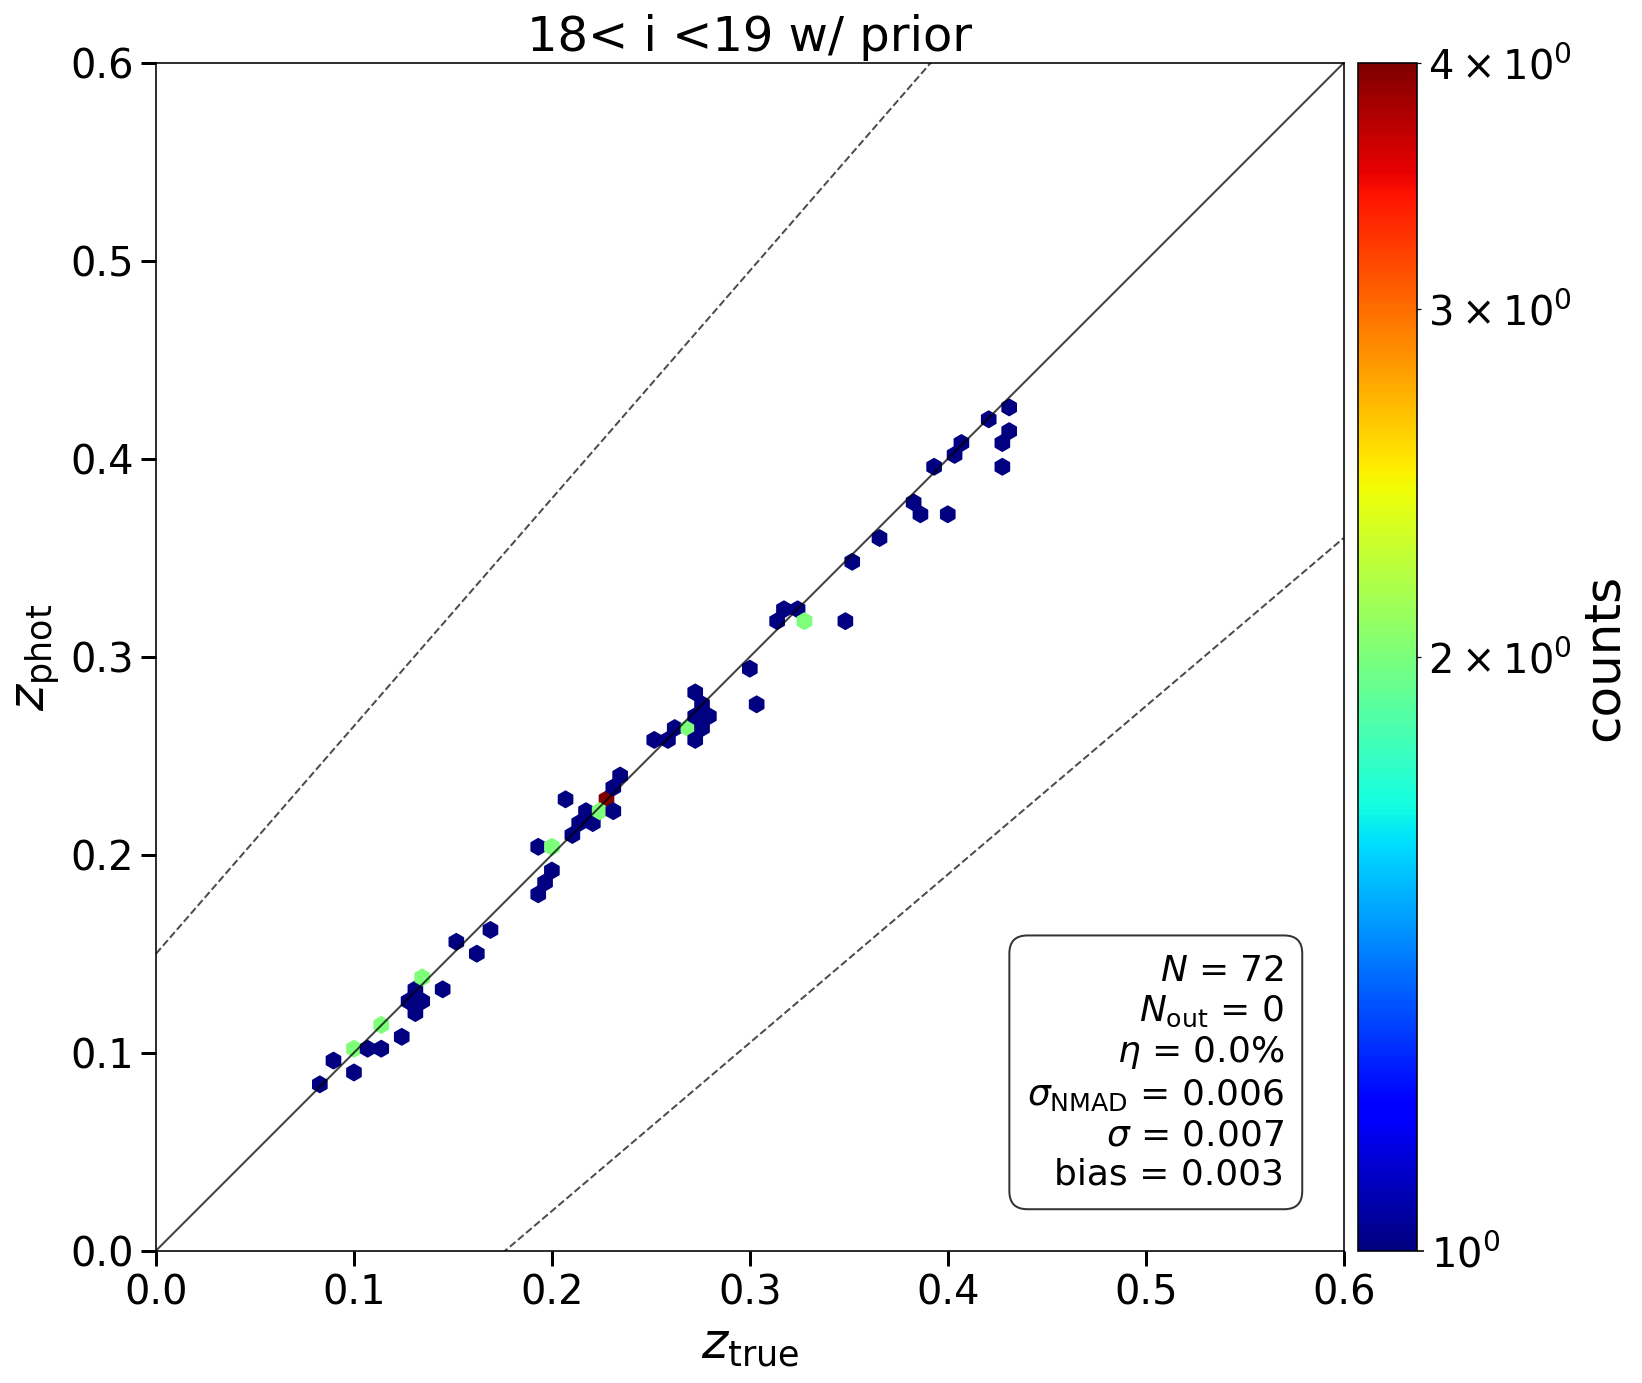

In [56]:
ez.ZML_WITH_PRIOR = False
ez.fit_at_zbest(prior=False, nproc=1)
cat = Table.read(WD/f'data/fiducial102_reduced_i{imag:02d}.fits')
id_out = plot_comp_hexbin(cat['z_true'], ez.zbest, ez.chi2_best,
                          'Fig1-comp_z_eazypy.png', ez.idx,
                          label_x=r"$z_{\rm true}$", label_y=r"$z_{\rm phot}$",
                          title=f"{imag-1:02d}< i <{imag:02d} w/o prior",
                          xmin=0, xmax=0.6, cmap='jet',
                          scatter_plot=False, gridsize=(87,50), log_scale=False)

cat['z_phot'] = ez.zbest
cat['z_phot_chi2'] = ez.chi2_best
cat.write(dir_output/f'simple_output_i{imag:02d}_wo_prior.fits', overwrite=True)

ez.ZML_WITH_PRIOR = True
ez.fit_at_zbest(prior=True, nproc=1)

cat = Table.read(WD/f'data/fiducial102_reduced_i{imag:02d}.fits')
id_out = plot_comp_hexbin(cat['z_true'], ez.zbest, ez.chi2_best,
                          'Fig1-comp_z_eazypy.png', ez.idx,
                          label_x=r"$z_{\rm true}$", label_y=r"$z_{\rm phot}$",
                          title=f"{imag-1:02d}< i <{imag:02d} w/ prior",
                          xmin=0, xmax=0.6, cmap='jet',
                          scatter_plot=False, gridsize=(87,50), log_scale=False)

cat['z_phot'] = ez.zbest
cat['z_phot_chi2'] = ez.chi2_best
cat.write(dir_output/f'simple_output_i{imag:02d}_prior.fits', overwrite=True)

In [58]:
imag = 19

dir_output = WD/f"output_combined_i{imag:02d}"
dir_outfig = dir_output/f"outfig_i{imag:02d}"
if not dir_output.exists():
    dir_output.mkdir()
if not dir_outfig.exists():
    dir_outfig.mkdir()

params['OUTPUT_DIRECTORY']  = dir_output.as_posix()
params['MAIN_OUTPUT_FILE']  = f"output_i{imag:02d}"

params['TEMPLATE_COMBOS']   = 1
params['Z_STEP']            = 0.003

params['CATALOG_FILE']      = f"data/synphot_combined_i{imag:02d}.dat" 
params['FILTERS_RES']       = "FILTERS+spherex_reduced_fullband_halfband.res"
with open('tempfilt0003_comb.pickle', 'rb') as rfile:
    tempfilt = pickle.load(rfile)

# params['TEMPLATES_FILE']    = "BROWN_COSMOS.template"
params['TEMPLATES_FILE']    = "spherex_brown_cosmos.templates"
    
ez = eazy.photoz.PhotoZ(param_file=None, translate_file=translate_filename,
                        zeropoint_file=None, params=params, tempfilt=tempfilt, )
ez.fit_catalog(ez.idx, n_proc=1)
# ez.fit_single_templates()

Read default param file: /data1/hbahk/envs/main/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: data/synphot_combined_i19.dat
   >>> NOBJ = 73
F419 E419 (419): SPHEREx_Band1_1
F420 E420 (420): SPHEREx_Band1_2
F421 E421 (421): SPHEREx_Band1_3
F422 E422 (422): SPHEREx_Band1_4
F423 E423 (423): SPHEREx_Band1_5
F424 E424 (424): SPHEREx_Band1_6
F425 E425 (425): SPHEREx_Band1_7
F426 E426 (426): SPHEREx_Band1_8
F427 E427 (427): SPHEREx_Band1_9
F428 E428 (428): SPHEREx_Band1_10
F429 E429 (429): SPHEREx_Band1_11
F430 E430 (430): SPHEREx_Band1_12
F431 E431 (431): SPHEREx_Band1_13
F432 E432 (432): SPHEREx_Band1_14
F433 E433 (433): SPHEREx_Band1_15
F434 E434 (434): SPHEREx_Band1_16
F435 E435 (435): SPHEREx_Band1_17
F436 E436 (436): SPHEREx_Band2_1
F437 E437 (437): SPHEREx_Band2_2
F438 E438 (438): SPHEREx_Band2_3
F439 E439 (439): SPHEREx_Band2_4
F440 E440 (440): SPHEREx_Band2_5
F441 E441 (441): SPHEREx_Band2_6
F442 E442 (442): SPHEREx_Band2_7
F443 E443 (443): SPHEREx_Ban

635it [00:00, 8007.00it/s]
100%|██████████| 635/635 [01:16<00:00,  8.25it/s]


Compute best fits
fit_best: 0.2 s (n_proc=1,  NOBJ=72)
Fit 77.9 s (n_proc=1, NOBJ=73)


fit_best: 0.1 s (n_proc=1,  NOBJ=72)
Objects : 72
Outliers: 0


fit_best: 0.1 s (n_proc=1,  NOBJ=72)
Objects : 72
Outliers: 0




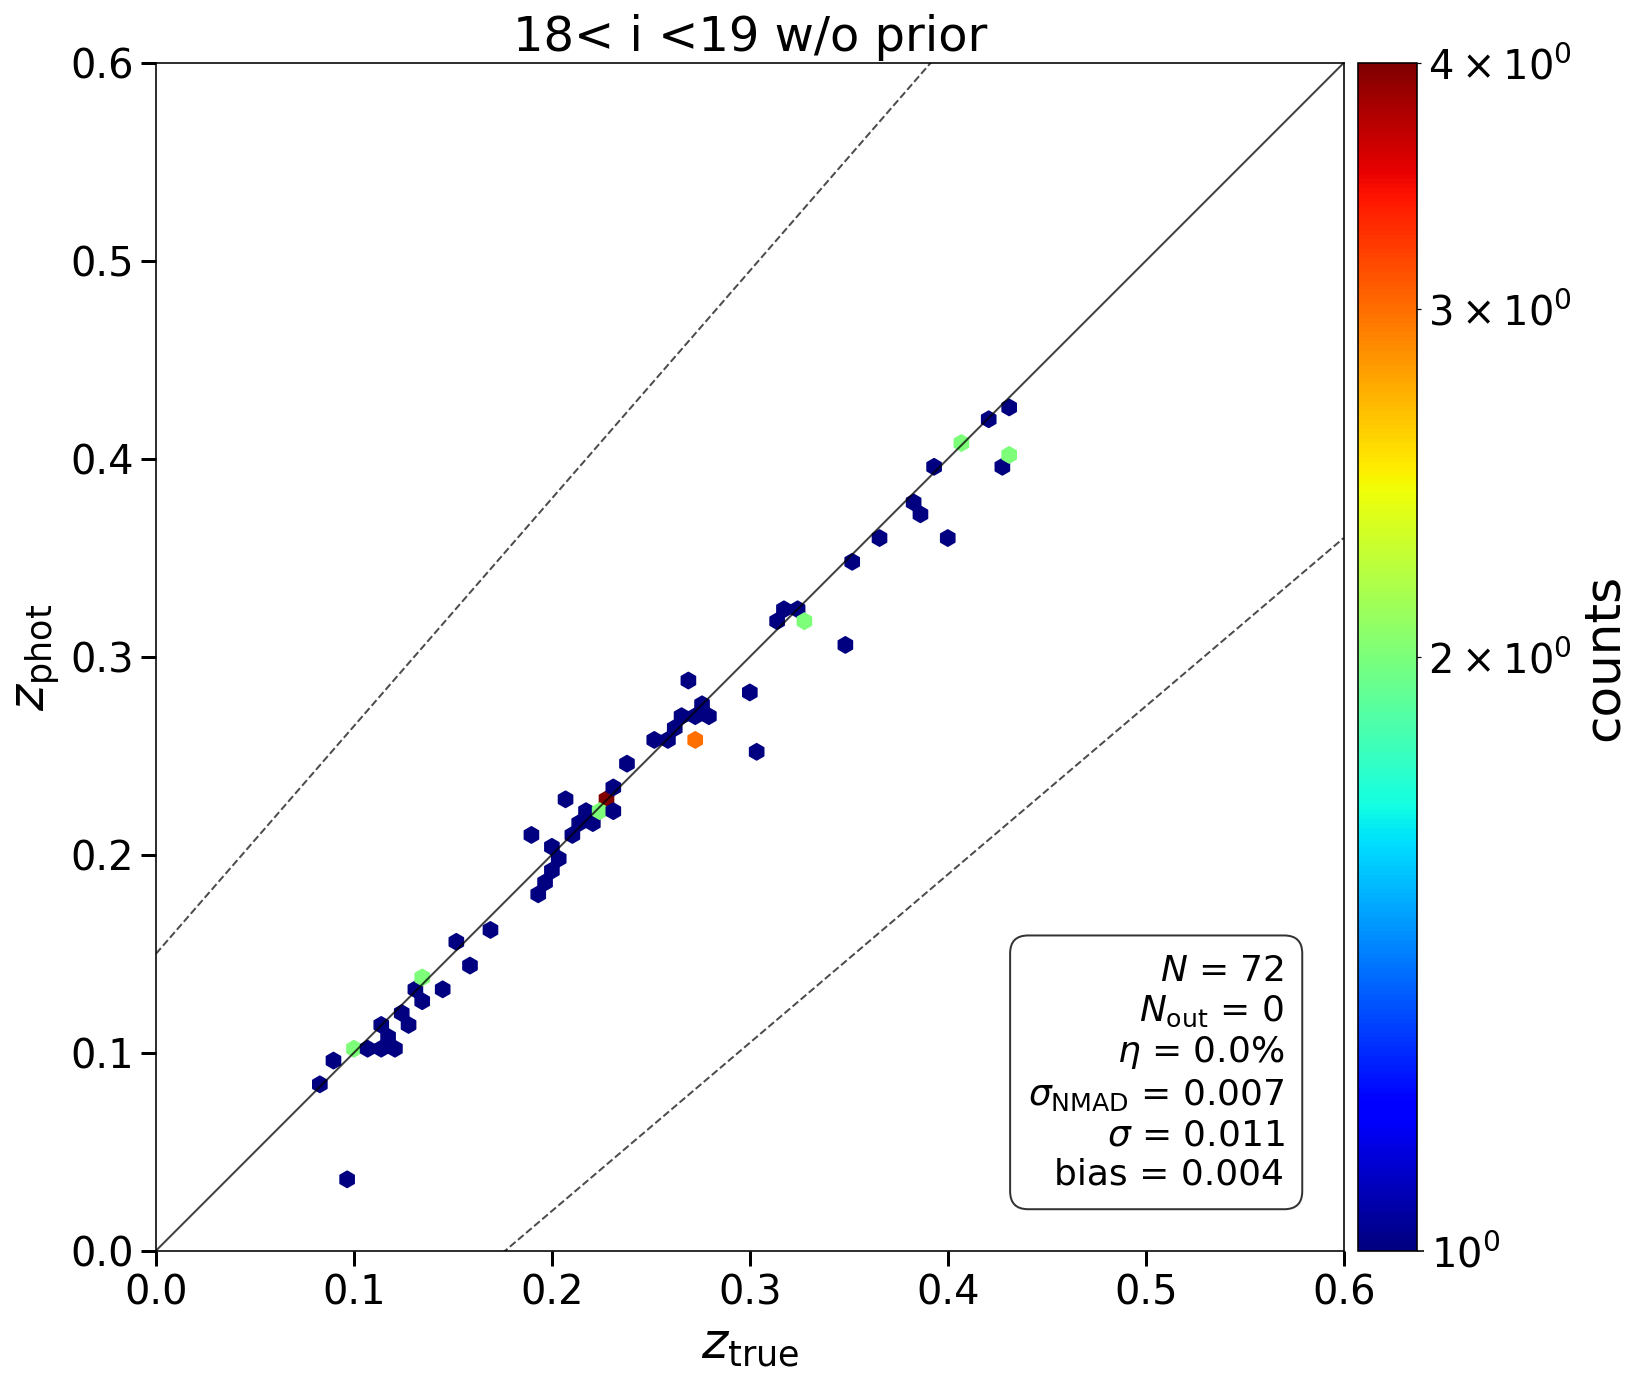

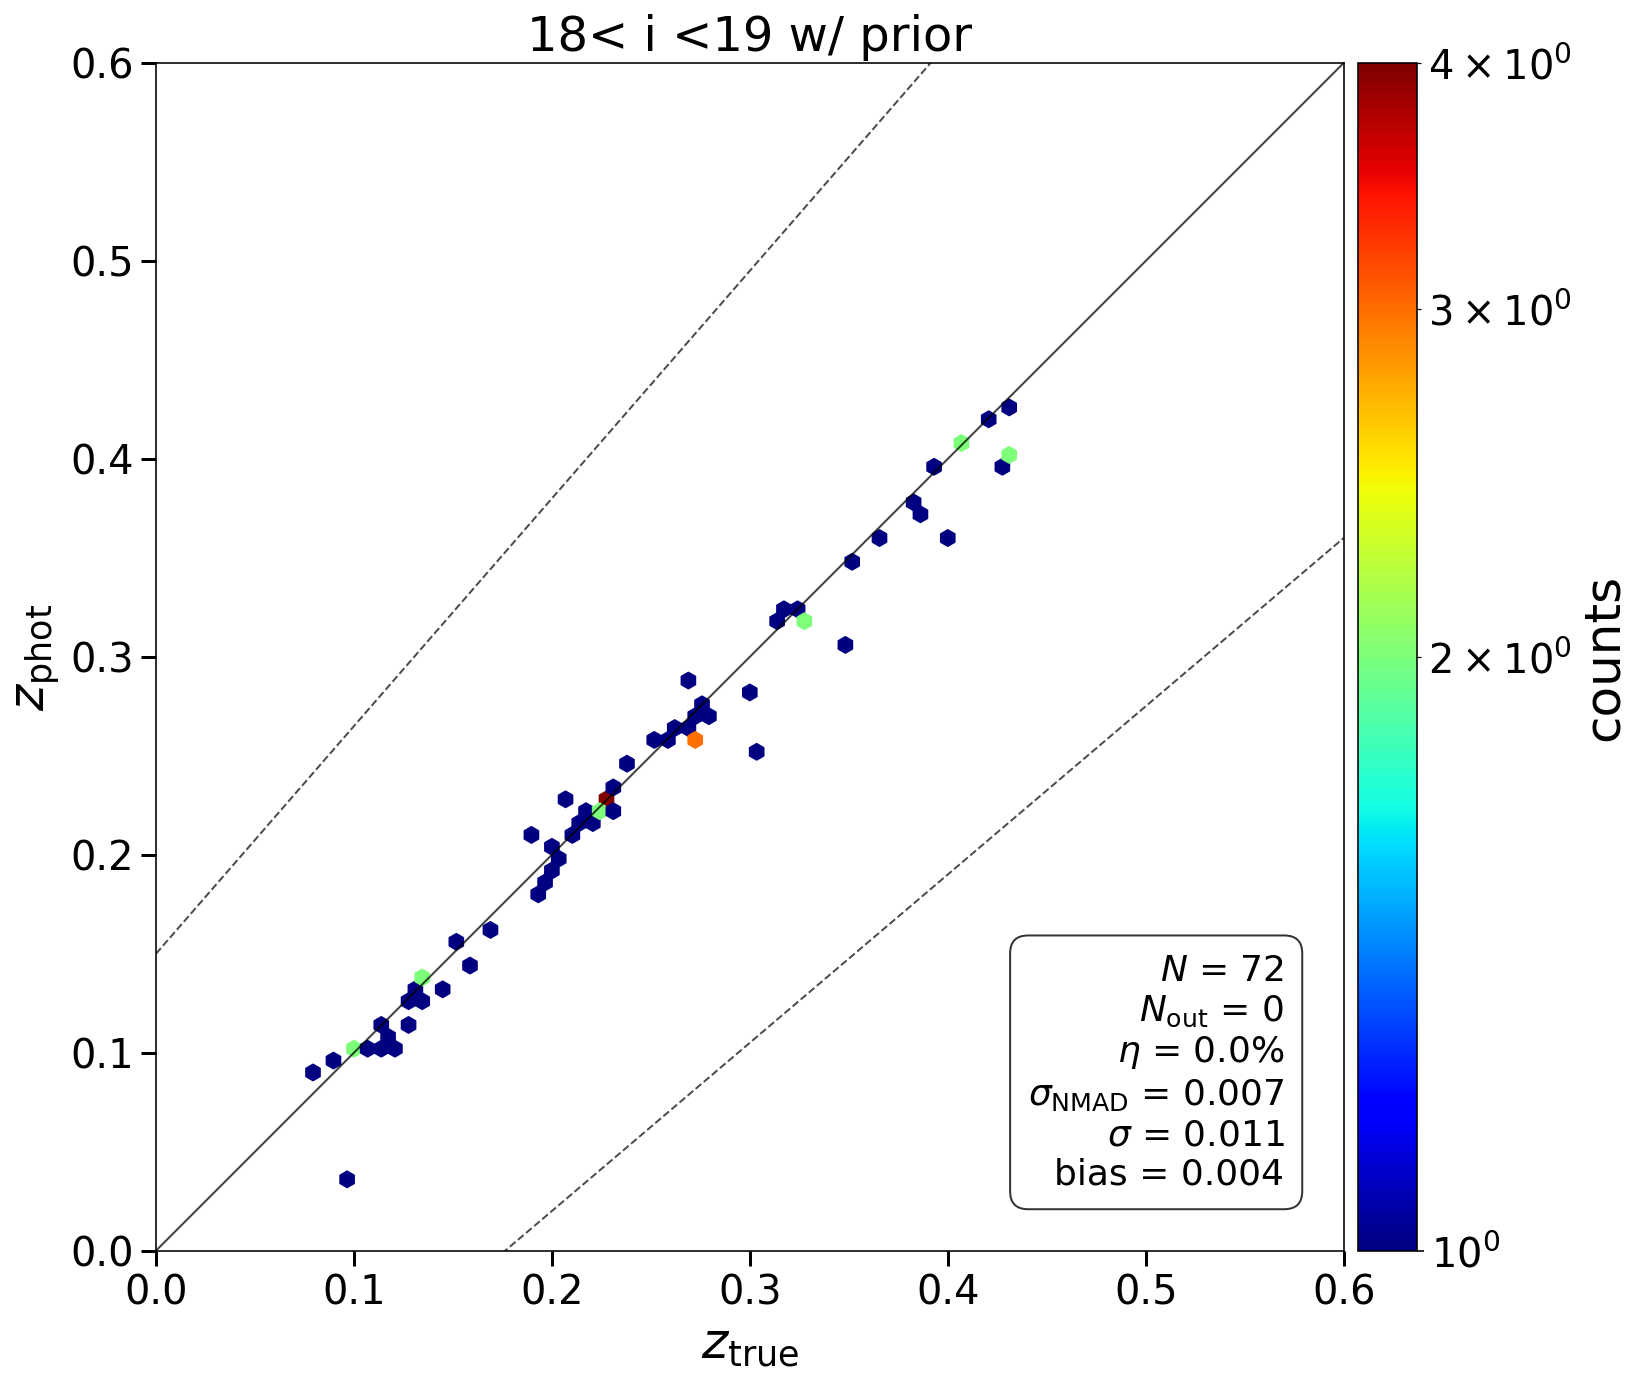

In [59]:
ez.ZML_WITH_PRIOR = False
ez.fit_at_zbest(prior=False, nproc=1)
cat = Table.read(WD/f'data/fiducial102_reduced_i{imag:02d}.fits')
id_out = plot_comp_hexbin(cat['z_true'], ez.zbest, ez.chi2_best,
                          'Fig1-comp_z_eazypy.png', ez.idx,
                          label_x=r"$z_{\rm true}$", label_y=r"$z_{\rm phot}$",
                          title=f"{imag-1:02d}< i <{imag:02d} w/o prior",
                          xmin=0, xmax=0.6, cmap='jet',
                          scatter_plot=False, gridsize=(87,50), log_scale=False)

cat['z_phot'] = ez.zbest
cat['z_phot_chi2'] = ez.chi2_best
cat.write(dir_output/f'simple_output_i{imag:02d}_wo_prior.fits', overwrite=True)

ez.ZML_WITH_PRIOR = True
ez.fit_at_zbest(prior=True, nproc=1)

cat = Table.read(WD/f'data/fiducial102_reduced_i{imag:02d}.fits')
id_out = plot_comp_hexbin(cat['z_true'], ez.zbest, ez.chi2_best,
                          'Fig1-comp_z_eazypy.png', ez.idx,
                          label_x=r"$z_{\rm true}$", label_y=r"$z_{\rm phot}$",
                          title=f"{imag-1:02d}< i <{imag:02d} w/ prior",
                          xmin=0, xmax=0.6, cmap='jet',
                          scatter_plot=False, gridsize=(87,50), log_scale=False)

cat['z_phot'] = ez.zbest
cat['z_phot_chi2'] = ez.chi2_best
cat.write(dir_output/f'simple_output_i{imag:02d}_prior.fits', overwrite=True)